In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score, KFold

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
np.random.seed=0


# PRE-PROCESSING

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204277 entries, 0 to 204276
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          204277 non-null  object 
 1   Age             204277 non-null  int64  
 2   Income          204277 non-null  int64  
 3   LoanAmount      204277 non-null  int64  
 4   CreditScore     204277 non-null  int64  
 5   MonthsEmployed  204277 non-null  int64  
 6   NumCreditLines  204277 non-null  int64  
 7   InterestRate    204277 non-null  float64
 8   LoanTerm        204277 non-null  int64  
 9   DTIRatio        204277 non-null  float64
 10  Education       204277 non-null  object 
 11  EmploymentType  204277 non-null  object 
 12  MaritalStatus   204277 non-null  object 
 13  HasMortgage     204277 non-null  object 
 14  HasDependents   204277 non-null  object 
 15  LoanPurpose     204277 non-null  object 
 16  HasCoSigner     204277 non-null  object 
 17  Default   

In [ ]:
train_df.isnull().sum()

,0
LoanID,0
Age,0
Income,0
LoanAmount,0
CreditScore,0
MonthsEmployed,0
NumCreditLines,0
InterestRate,0
LoanTerm,0
DTIRatio,0


In [ ]:
train_df.duplicated().sum()

0

In [ ]:
train_df.describe()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Default
count,204277.000000,204277.000000,204277.000000,204277.000000,204277.000000,204277.000000,204277.000000,204277.000000,204277.000000,204277.000000
mean,43.489340,82506.227980,127547.496395,574.075500,59.508511,2.502078,13.488147,36.010926,0.500579,0.116278
std,14.995191,38952.103374,70855.064746,158.877098,34.645589,1.116898,6.636060,16.944827,0.230914,0.320559
min,18.000000,15000.000000,5001.000000,300.000000,0.000000,1.000000,2.000000,12.000000,0.100000,0.000000
25%,31.000000,48878.000000,66059.000000,437.000000,30.000000,2.000000,7.760000,24.000000,0.300000,0.000000
50%,43.000000,82400.000000,127603.000000,574.000000,59.000000,3.000000,13.450000,36.000000,0.500000,0.000000
75%,56.000000,116247.000000,188843.000000,712.000000,90.000000,4.000000,19.240000,48.000000,0.700000,0.000000
max,69.000000,149999.000000,249999.000000,849.000000,119.000000,4.000000,25.000000,60.000000,0.900000,1.000000


In [ ]:
train_df.describe()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Default
count,361048.000000,361048.000000,361048.000000,361048.000000,361048.000000,361048.000000,361048.000000,361048.000000,361048.000000,361048.000000
mean,40.491176,77749.437371,134746.193340,567.910522,55.535943,2.540477,14.530145,36.019576,0.505136,0.500000
std,14.933045,40066.706923,70764.317417,158.966197,34.595278,1.118829,6.607881,16.962970,0.229977,0.500001
min,18.000000,15000.000000,5001.000000,300.000000,0.000000,1.000000,2.000000,12.000000,0.100000,0.000000
25%,27.000000,41800.500000,74441.000000,429.000000,25.000000,2.000000,8.980000,24.000000,0.310000,0.000000
50%,39.000000,75967.000000,138553.000000,565.000000,53.000000,3.000000,15.000000,36.000000,0.510000,0.500000
75%,53.000000,112481.000000,197153.000000,704.000000,85.000000,4.000000,20.340000,48.000000,0.700000,1.000000
max,69.000000,149999.000000,249999.000000,849.000000,119.000000,4.000000,25.000000,60.000000,0.900000,1.000000


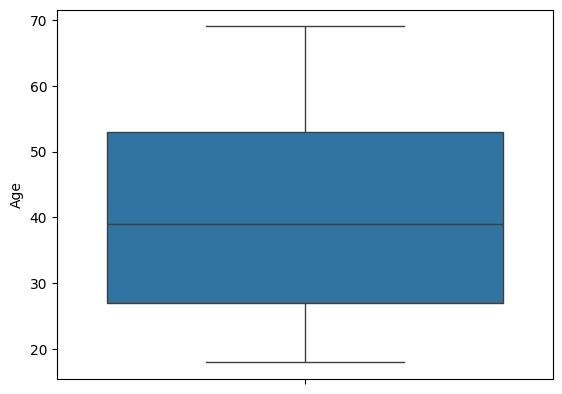

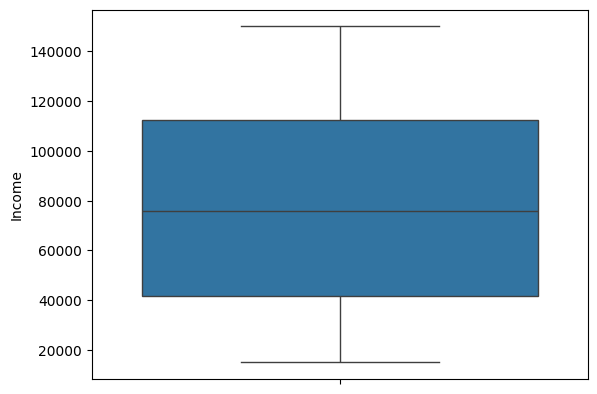

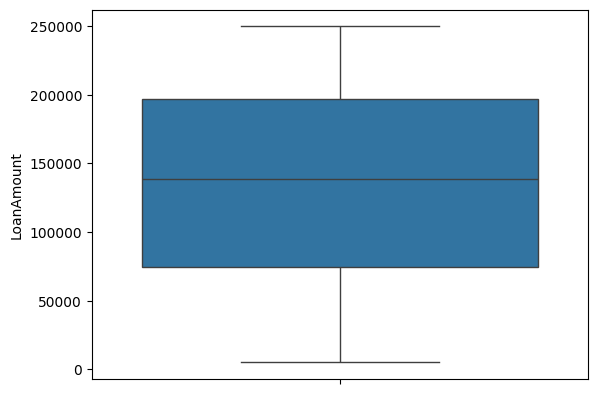

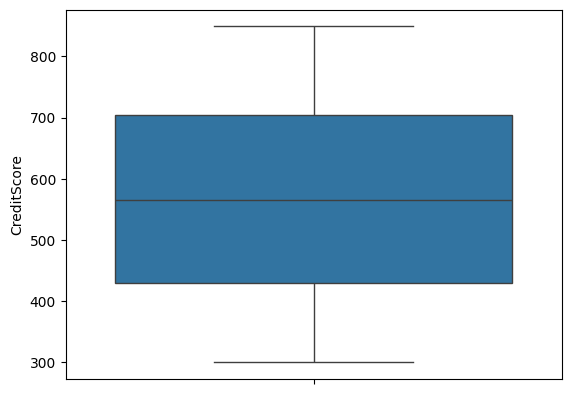

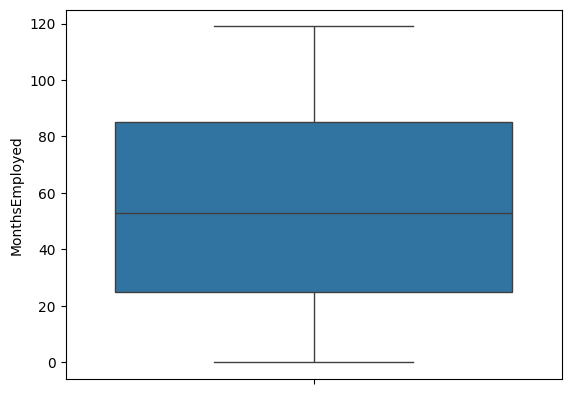

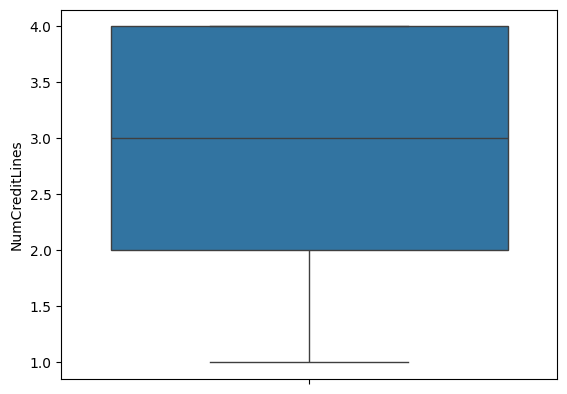

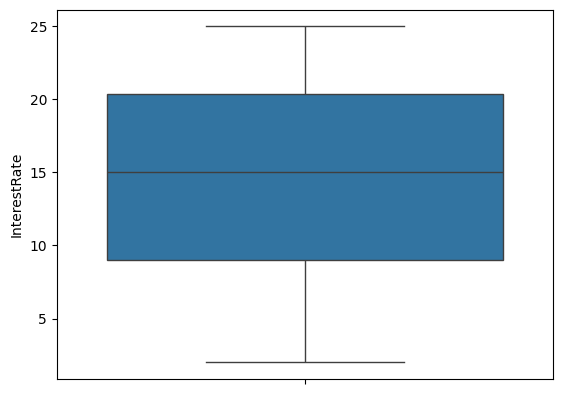

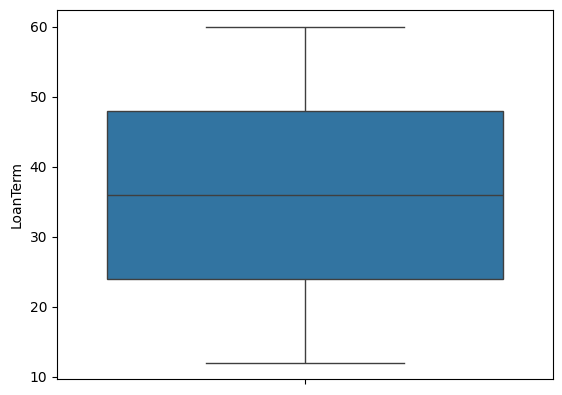

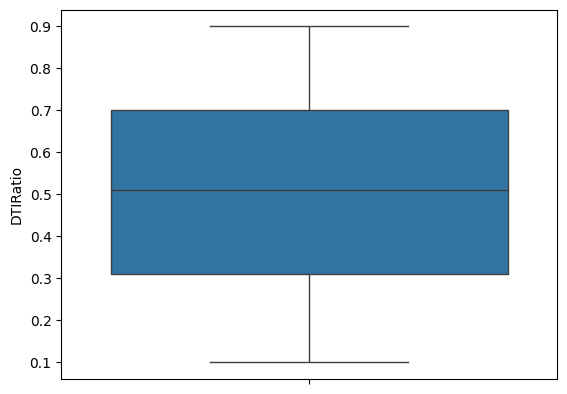

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(data=train_df, y='Age')
plt.show()
sns.boxplot(data=train_df, y='Income')
plt.show()
sns.boxplot(data=train_df, y='LoanAmount')
plt.show()
sns.boxplot(data=train_df, y='CreditScore')
plt.show()
sns.boxplot(data=train_df, y='MonthsEmployed')
plt.show()
sns.boxplot(data=train_df, y='NumCreditLines')
plt.show()
sns.boxplot(data=train_df, y='InterestRate')
plt.show()
sns.boxplot(data=train_df, y='LoanTerm')
plt.show()
sns.boxplot(data=train_df, y='DTIRatio')
plt.show()

In [ ]:
train_df.head(10)

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,DRIRC89L0T,18,137576,209136,846,26,2,10.47,60,0.81,High School,Self-employed,Single,Yes,No,Business,No,0
1,TS0FIUNHNU,47,57194,5970,748,30,2,19.72,36,0.73,High School,Unemployed,Divorced,No,Yes,Education,No,0
2,I0YR284A1V,26,84328,95065,453,7,2,24.25,12,0.45,Master's,Self-employed,Married,No,No,Other,Yes,0
3,WB1T7NQV8A,53,49795,229582,533,107,3,14.44,60,0.17,Bachelor's,Self-employed,Single,Yes,No,Auto,Yes,1
4,J6GU9M4G1Z,49,115450,22072,840,0,4,24.48,12,0.11,Bachelor's,Part-time,Single,No,Yes,Education,Yes,0
5,UVT2FMEWUR,33,44855,39393,416,80,4,16.25,12,0.76,Bachelor's,Unemployed,Single,No,No,Other,Yes,0
6,023MJWH6AS,22,20216,153128,692,90,4,22.91,60,0.32,High School,Self-employed,Married,No,Yes,Auto,No,0
7,W2J1SLV57M,57,90343,71189,345,102,4,12.98,12,0.71,Bachelor's,Unemployed,Married,No,Yes,Other,Yes,0
8,QGIXFHVHO1,49,35880,96919,353,33,2,10.97,24,0.31,PhD,Self-employed,Divorced,Yes,No,Other,Yes,1
9,QRZHVC1HRR,19,71995,23105,587,105,2,2.06,12,0.38,High School,Unemployed,Divorced,No,Yes,Other,Yes,0


In [ ]:
a = train_df[train_df["Default"] == 1.0]
print(a)

        Age  Income  LoanAmount  CreditScore  MonthsEmployed  NumCreditLines  \
3        53   49795      229582          533             107               3   
8        49   35880       96919          353              33               2   
19       45  138570       98221          487              71               3   
22       34   90658      160123          739              32               4   
29       19   72552      142675          808              85               4   
...     ...     ...         ...          ...             ...             ...   
204259   25   82547      208011          357              67               2   
204261   41  115899      120319          431              91               4   
204266   43   28058        9796          473              45               1   
204267   18   52359      179039          772               0               2   
204276   36   97844      188593          542               2               3   

        InterestRate  LoanTerm  DTIRati

Removing Loan ID

In [3]:
train_df = train_df.drop(columns=['LoanID'],axis = 1)

Label Encoding

In [4]:
from sklearn.preprocessing import LabelEncoder

In [5]:
le = LabelEncoder()
train_df_columns = ['Education','EmploymentType','MaritalStatus','LoanPurpose','HasMortgage','HasDependents','HasCoSigner']
for col in train_df_columns:
    train_df[col] = le.fit_transform(train_df[col])

In [6]:
le = LabelEncoder()
test_df_columns = ['Education','EmploymentType','MaritalStatus','LoanPurpose','HasMortgage','HasDependents','HasCoSigner']
for col in test_df_columns:
    test_df[col] = le.fit_transform(test_df[col])

In [ ]:
test_df.head(10)

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner
0,CKV34LU7V7,55,112656,92393,581,113,2,23.54,36,0.15,PhD,Self-employed,Single,Yes,Yes,Home,No
1,62KTYNH93J,56,91569,131575,641,54,1,15.19,12,0.43,High School,Part-time,Divorced,Yes,Yes,Education,Yes
2,JGFUSOIUH7,26,78169,75417,569,105,3,18.02,12,0.29,Master's,Part-time,Married,Yes,Yes,Education,Yes
3,4538THBHOX,26,63033,10804,326,118,1,14.71,24,0.41,High School,Part-time,Single,No,No,Business,Yes
4,DXLNA06JHR,24,29665,21182,662,102,3,15.02,60,0.69,PhD,Unemployed,Single,No,Yes,Business,Yes
5,GPXN95JGCL,41,98511,187008,731,20,4,14.88,36,0.46,Master's,Full-time,Divorced,Yes,No,Other,No
6,FIIMGYJEVG,66,49411,159105,371,86,4,13.35,60,0.12,Bachelor's,Self-employed,Married,No,No,Business,Yes
7,22OCHURLWV,34,117617,173967,518,86,4,2.21,12,0.39,High School,Part-time,Single,No,Yes,Business,Yes
8,OKUSLEJ0SG,67,94473,41189,542,15,2,10.17,36,0.33,Master's,Self-employed,Single,No,Yes,Home,No
9,CL8B73H82O,41,95332,151275,363,39,3,12.88,36,0.66,High School,Self-employed,Single,Yes,Yes,Home,Yes


In [ ]:
train_df.head(10)

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,18,137576,209136,846,26,2,10.47,60,0.81,1,2,2,1,0,1,0,0
1,47,57194,5970,748,30,2,19.72,36,0.73,1,3,0,0,1,2,0,0
2,26,84328,95065,453,7,2,24.25,12,0.45,2,2,1,0,0,4,1,0
3,53,49795,229582,533,107,3,14.44,60,0.17,0,2,2,1,0,0,1,1
4,49,115450,22072,840,0,4,24.48,12,0.11,0,1,2,0,1,2,1,0
5,33,44855,39393,416,80,4,16.25,12,0.76,0,3,2,0,0,4,1,0
6,22,20216,153128,692,90,4,22.91,60,0.32,1,2,1,0,1,0,0,0
7,57,90343,71189,345,102,4,12.98,12,0.71,0,3,1,0,1,4,1,0
8,49,35880,96919,353,33,2,10.97,24,0.31,3,2,0,1,0,4,1,1
9,19,71995,23105,587,105,2,2.06,12,0.38,1,3,0,0,1,4,1,0


In [7]:
df = train_df

In [116]:

df_default_0 = df[df['Default'] == 0]
df_default_1 = df[df['Default'] == 1]

# Get the number of rows for Default=0 and Default=1
num_default_0 = df_default_0.shape[0]
num_default_1 = df_default_1.shape[0]

# If Default=1 is less frequent, we'll add noise to the Default=1 class
if num_default_1 < num_default_0:
    # Calculate how many additional rows are needed to balance
    additional_rows_needed = num_default_0 - num_default_1

    # Define noise parameters (mean = 0, standard deviation as a fraction of column values)
    noise_scale = 1  # Noise scale for continuous variables (5% of the value)

    # Add noise to the Default=1 rows
    noise_added = df_default_1.copy()

    # For each numeric column, add Gaussian noise
    numeric_columns = ['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed',
                       'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio']  # List of numeric columns

    for column in numeric_columns:
        noise = np.random.normal(0, noise_scale * noise_added[column].std(), size=noise_added[column].shape)
        noise_added[column] += noise

    # Ensure no negative or unreasonable values
    noise_added[numeric_columns] = noise_added[numeric_columns].clip(lower=0)

    # Select the first `additional_rows_needed` from the noise_added
    noise_added = noise_added.sample(n=additional_rows_needed, replace=True, random_state=42)

    # Combine the original Default=1 with the new noise-added rows and Default=0
    df_balanced = pd.concat([df_default_0, df_default_1, noise_added], axis=0)

    # Shuffle the combined dataframe
    df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

# Print the resulting dataset sizes
print(f"Original dataset size: {df.shape}")
print(f"Balanced dataset size: {df_balanced.shape}")


Original dataset size: (204277, 17)
Balanced dataset size: (361048, 17)


In [117]:
df = df_balanced

In [ ]:
df_default_0 = df[df['Default'] == 0]
df_default_1 = df[df['Default'] == 1]
print(df_default_0.shape)
print(df_default_1.shape)

(180524, 17)
(180524, 17)


In [ ]:
df.head()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,62.181644,48084.001907,36222.974312,643.950754,54.084753,2.109796,19.243456,60.220596,0.583682,0,0,2,0,1,1,1,0
1,43.979461,35299.911821,43317.093637,591.001080,6.016915,0.943270,2.254689,60.050799,0.554137,0,2,1,0,1,2,1,0
2,60.102940,25101.927522,147475.926455,539.123642,29.911214,1.833519,7.290033,47.907893,0.932397,2,0,1,0,1,2,0,0
3,67.000000,91502.000000,86714.000000,467.000000,90.000000,2.000000,4.760000,24.000000,0.510000,2,0,2,0,1,1,0,0
4,36.000000,86903.000000,20064.000000,472.000000,47.000000,1.000000,21.830000,60.000000,0.500000,3,2,1,1,1,2,0,0


Observe any correlations

In [ ]:
all_correlations = pd.DataFrame(df.corr())
survived_correlations = all_correlations['Default']
survived_correlations.sort_values(ascending=True)

,Default
Age,-0.167484
Income,-0.100515
MonthsEmployed,-0.095429
HasCoSigner,-0.040688
HasDependents,-0.034737
CreditScore,-0.034128
Education,-0.021508
HasMortgage,-0.021174
LoanPurpose,-0.010799
MaritalStatus,-0.008441


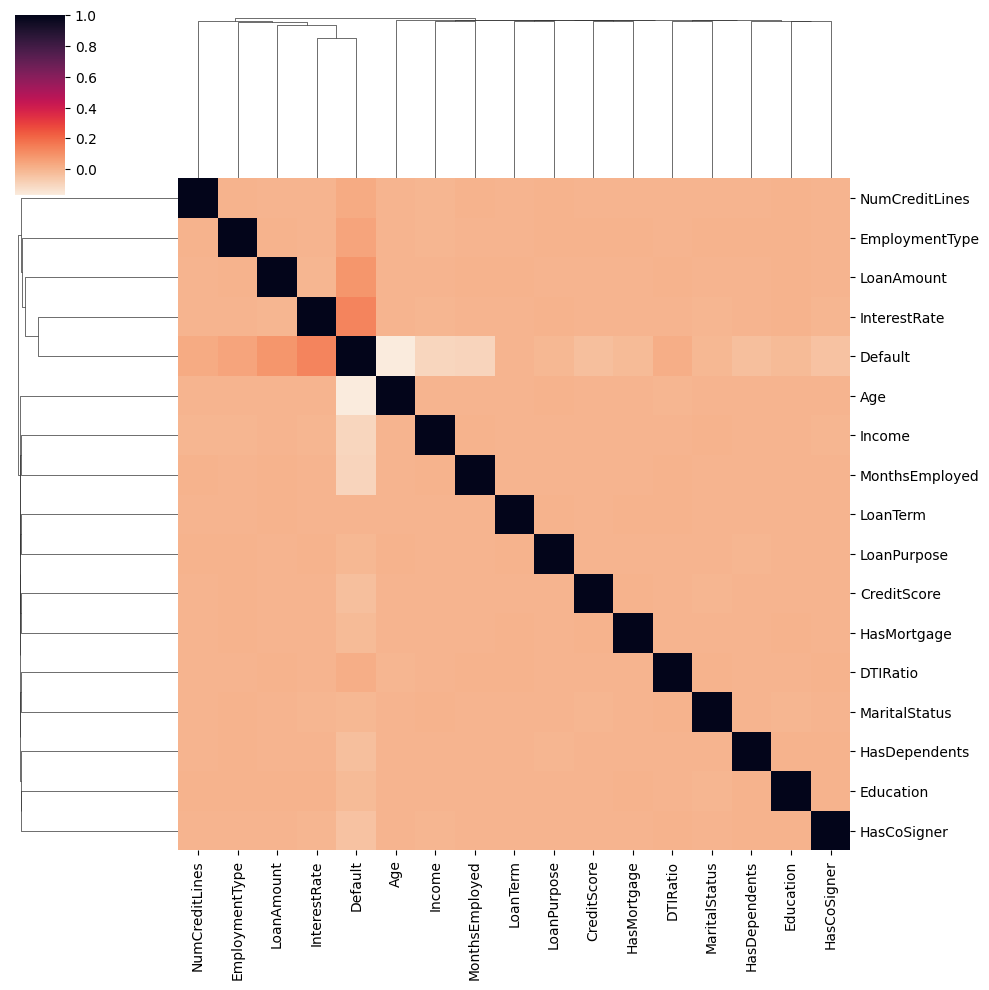

In [ ]:
sns.clustermap(df.corr(), cmap="rocket_r")

In [ ]:
test_df.head(10)

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner
0,CKV34LU7V7,55,112656,92393,581,113,2,23.54,36,0.15,PhD,Self-employed,Single,Yes,Yes,Home,No
1,62KTYNH93J,56,91569,131575,641,54,1,15.19,12,0.43,High School,Part-time,Divorced,Yes,Yes,Education,Yes
2,JGFUSOIUH7,26,78169,75417,569,105,3,18.02,12,0.29,Master's,Part-time,Married,Yes,Yes,Education,Yes
3,4538THBHOX,26,63033,10804,326,118,1,14.71,24,0.41,High School,Part-time,Single,No,No,Business,Yes
4,DXLNA06JHR,24,29665,21182,662,102,3,15.02,60,0.69,PhD,Unemployed,Single,No,Yes,Business,Yes
5,GPXN95JGCL,41,98511,187008,731,20,4,14.88,36,0.46,Master's,Full-time,Divorced,Yes,No,Other,No
6,FIIMGYJEVG,66,49411,159105,371,86,4,13.35,60,0.12,Bachelor's,Self-employed,Married,No,No,Business,Yes
7,22OCHURLWV,34,117617,173967,518,86,4,2.21,12,0.39,High School,Part-time,Single,No,Yes,Business,Yes
8,OKUSLEJ0SG,67,94473,41189,542,15,2,10.17,36,0.33,Master's,Self-employed,Single,No,Yes,Home,No
9,CL8B73H82O,41,95332,151275,363,39,3,12.88,36,0.66,High School,Self-employed,Single,Yes,Yes,Home,Yes


In [ ]:
test_df.describe()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000
mean,437.111732,2.223464,0.614525,30.909665,0.402235,0.391061,30.684473,1.424581
std,260.349331,0.877501,0.488073,13.521263,0.730703,0.863185,39.447725,0.853716
min,6.000000,1.000000,0.000000,0.830000,0.000000,0.000000,0.000000,0.000000
25%,217.500000,1.000000,0.000000,21.833333,0.000000,0.000000,7.895800,1.000000
50%,423.000000,3.000000,1.000000,30.000000,0.000000,0.000000,14.500000,2.000000
75%,656.000000,3.000000,1.000000,38.000000,1.000000,0.000000,32.410400,2.000000
max,890.000000,3.000000,1.000000,71.000000,4.000000,5.000000,262.375000,2.000000


<ipython-input-39-7c348f5d80c9>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'Default' , y = df[col], data =df , palette = 'dark')


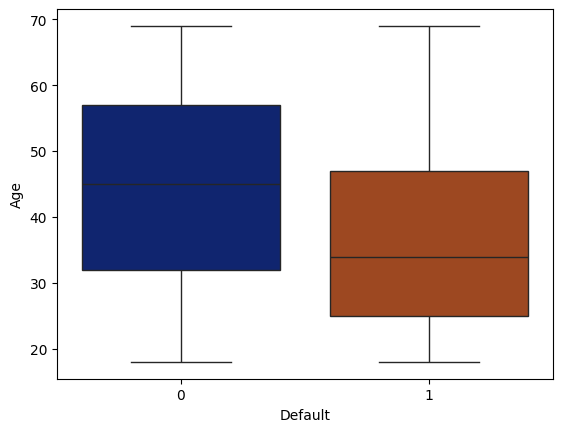

<ipython-input-39-7c348f5d80c9>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'Default' , y = df[col], data =df , palette = 'dark')


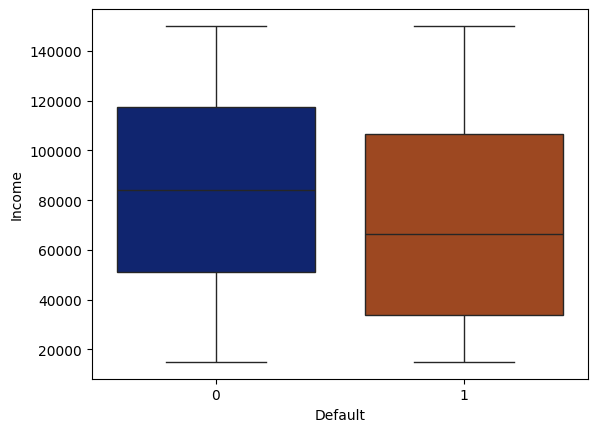

<ipython-input-39-7c348f5d80c9>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'Default' , y = df[col], data =df , palette = 'dark')


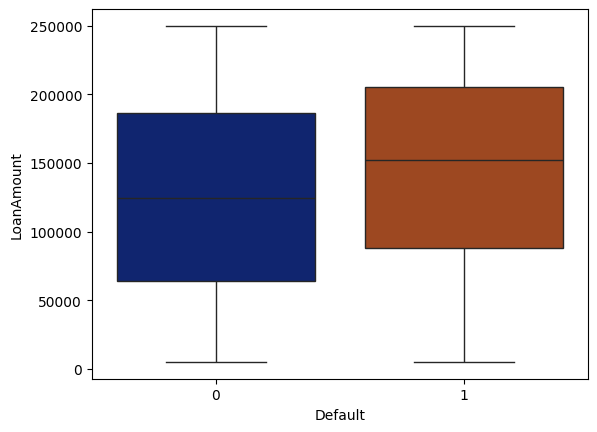

<ipython-input-39-7c348f5d80c9>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'Default' , y = df[col], data =df , palette = 'dark')


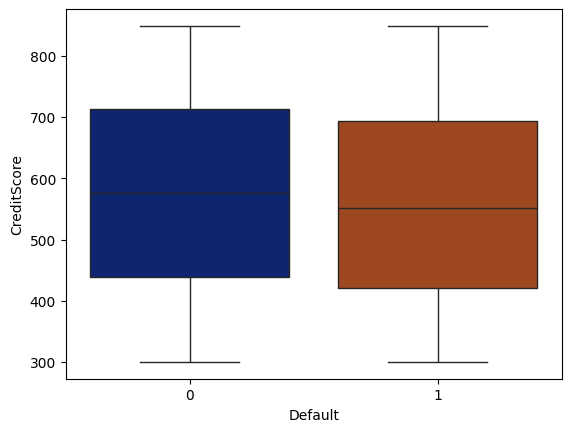

<ipython-input-39-7c348f5d80c9>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'Default' , y = df[col], data =df , palette = 'dark')


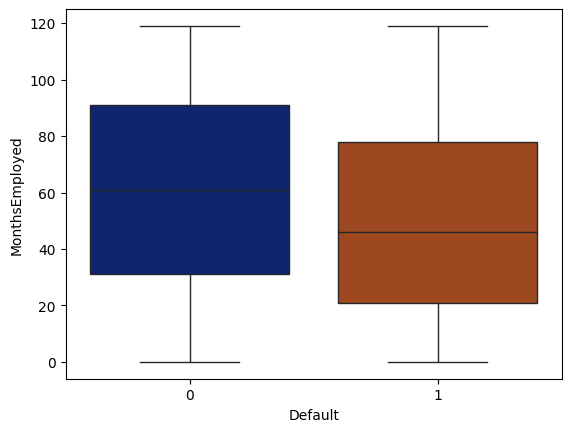

<ipython-input-39-7c348f5d80c9>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'Default' , y = df[col], data =df , palette = 'dark')


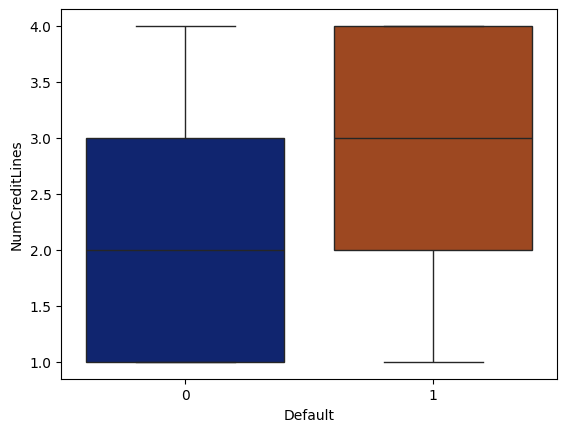

<ipython-input-39-7c348f5d80c9>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'Default' , y = df[col], data =df , palette = 'dark')


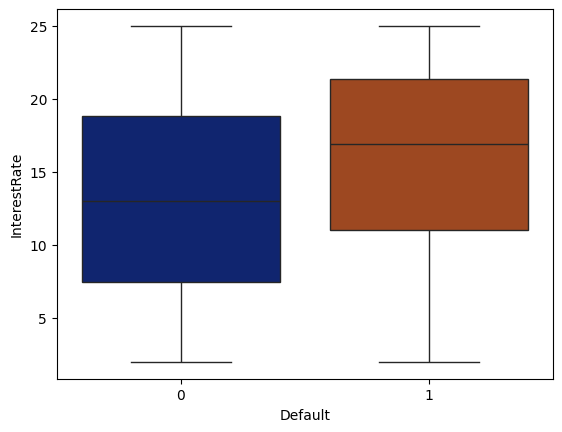

<ipython-input-39-7c348f5d80c9>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'Default' , y = df[col], data =df , palette = 'dark')


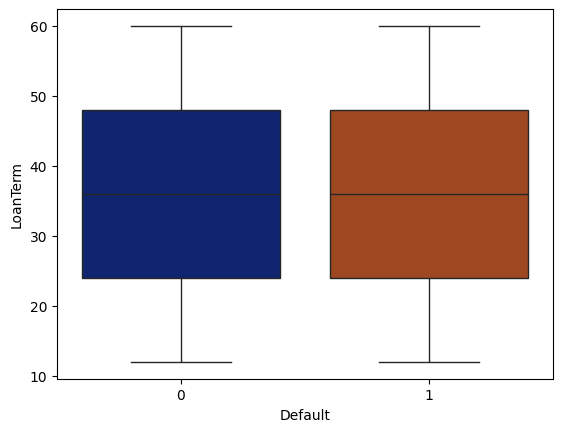

<ipython-input-39-7c348f5d80c9>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'Default' , y = df[col], data =df , palette = 'dark')


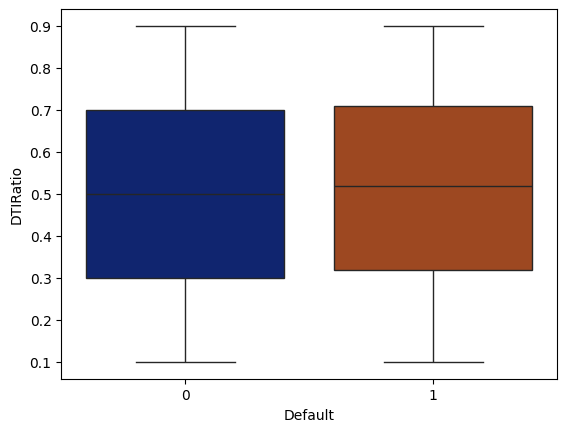

<ipython-input-39-7c348f5d80c9>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'Default' , y = df[col], data =df , palette = 'dark')


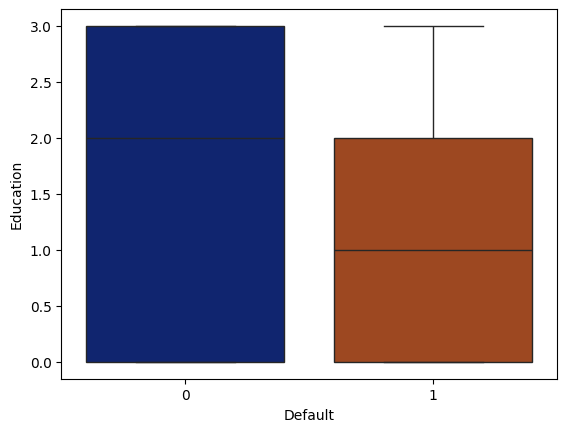

<ipython-input-39-7c348f5d80c9>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'Default' , y = df[col], data =df , palette = 'dark')


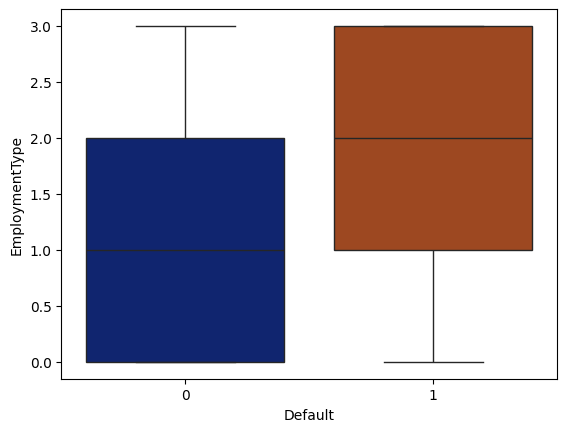

<ipython-input-39-7c348f5d80c9>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'Default' , y = df[col], data =df , palette = 'dark')


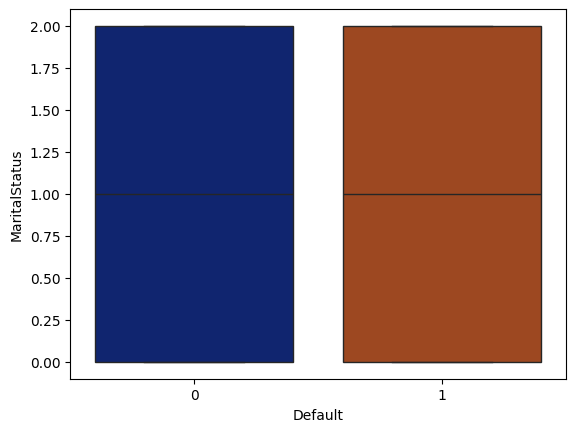

<ipython-input-39-7c348f5d80c9>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'Default' , y = df[col], data =df , palette = 'dark')


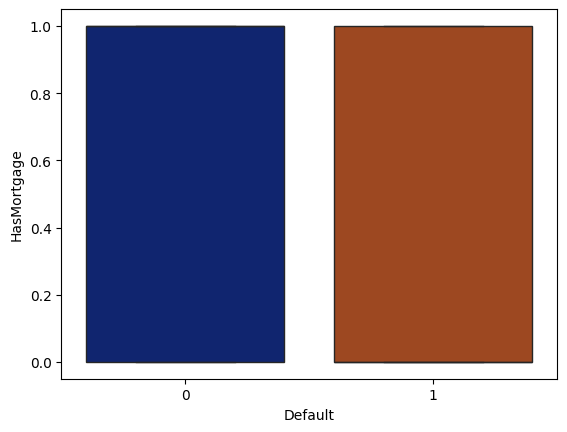

<ipython-input-39-7c348f5d80c9>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'Default' , y = df[col], data =df , palette = 'dark')


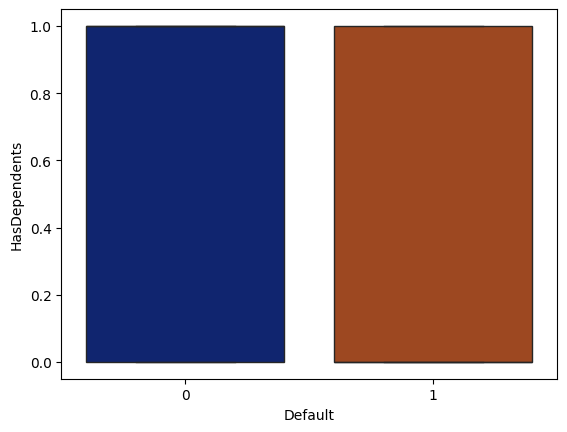

<ipython-input-39-7c348f5d80c9>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'Default' , y = df[col], data =df , palette = 'dark')


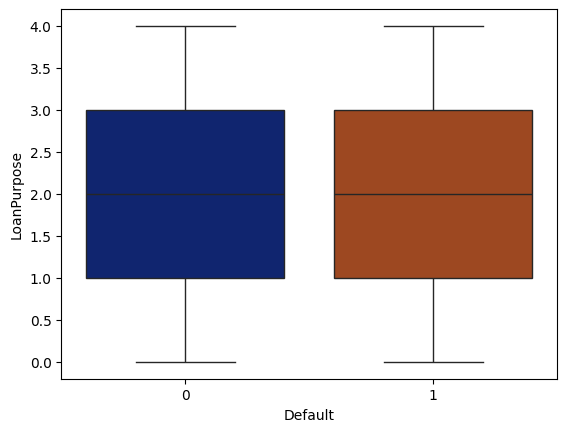

<ipython-input-39-7c348f5d80c9>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'Default' , y = df[col], data =df , palette = 'dark')


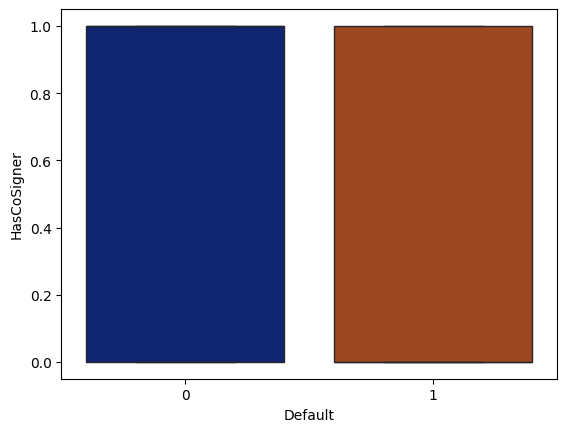

<ipython-input-39-7c348f5d80c9>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'Default' , y = df[col], data =df , palette = 'dark')


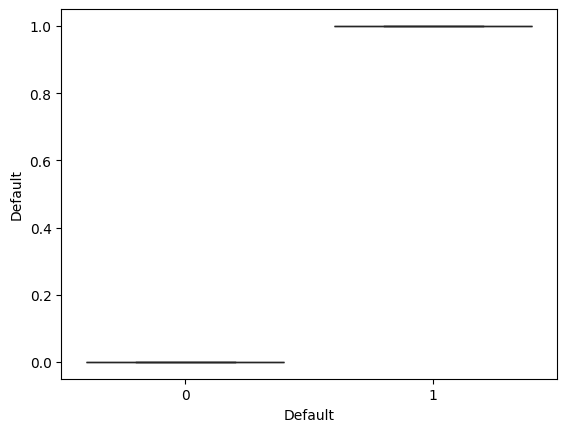

In [ ]:
for col in df:
    sns.boxplot(x = 'Default' , y = df[col], data =df , palette = 'dark')
    plt.show()

In [8]:
x = df.drop(columns=['Default'],axis = 1)
y = df['Default']

In [ ]:
df.describe()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
count,361048.000000,361048.000000,361048.000000,361048.000000,361048.000000,361048.000000,361048.000000,361048.000000,361048.000000,361048.000000,361048.000000,361048.000000,361048.000000,361048.000000,361048.000000,361048.000000,361048.000000
mean,40.495736,77852.460423,134699.995152,567.648239,55.544871,2.539092,14.524347,36.054646,0.505930,1.466802,1.556815,0.991115,0.485913,0.479393,1.983697,0.476183,0.500000
std,14.953095,40103.524704,70767.616460,158.930591,34.640943,1.120060,6.608124,16.974180,0.230073,1.115965,1.114090,0.825161,0.499802,0.499576,1.414000,0.499433,0.500001
min,15.917148,9301.558830,0.000000,278.914672,0.000000,0.784576,1.306836,9.078928,0.072437,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.287124,41884.351767,74514.636895,429.993503,25.000000,1.927616,8.990000,24.000000,0.310000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,39.000000,76317.500000,138277.803917,564.958549,53.600064,2.938309,14.992175,36.000000,0.510000,1.000000,2.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.500000
75%,53.000000,112598.250000,197018.000000,703.887793,85.000000,3.931365,20.320000,48.000000,0.705238,2.000000,3.000000,2.000000,1.000000,1.000000,3.000000,1.000000,1.000000
max,70.939048,153855.633333,258626.676753,868.951723,124.474588,4.199607,25.848483,63.344220,0.937451,3.000000,3.000000,2.000000,1.000000,1.000000,4.000000,1.000000,1.000000


In [ ]:
x.head(10)

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner
0,18,137576,209136,846,26,2,10.47,60,0.81,1,2,2,1,0,1,0
1,47,57194,5970,748,30,2,19.72,36,0.73,1,3,0,0,1,2,0
2,26,84328,95065,453,7,2,24.25,12,0.45,2,2,1,0,0,4,1
3,53,49795,229582,533,107,3,14.44,60,0.17,0,2,2,1,0,0,1
4,49,115450,22072,840,0,4,24.48,12,0.11,0,1,2,0,1,2,1
5,33,44855,39393,416,80,4,16.25,12,0.76,0,3,2,0,0,4,1
6,22,20216,153128,692,90,4,22.91,60,0.32,1,2,1,0,1,0,0
7,57,90343,71189,345,102,4,12.98,12,0.71,0,3,1,0,1,4,1
8,49,35880,96919,353,33,2,10.97,24,0.31,3,2,0,1,0,4,1
9,19,71995,23105,587,105,2,2.06,12,0.38,1,3,0,0,1,4,1


---
Training
---


In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=67)

In [ ]:
X_train.head(10)

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner
351216,26.000000,90343.000000,179358.000000,465.000000,79.000000,2.000000,10.960000,24.000000,0.170000,3,2,0,0,0,2,1
77541,57.632715,50079.716045,239804.841995,517.335563,84.577071,0.859101,22.798563,7.254190,0.650259,3,2,0,0,1,4,0
270612,38.000000,21516.000000,31007.000000,341.000000,48.000000,1.000000,23.300000,48.000000,0.390000,0,3,2,0,0,1,0
131659,49.000000,61485.000000,118733.000000,339.000000,89.000000,2.000000,23.560000,36.000000,0.220000,0,0,1,0,1,1,1
281016,55.169330,56953.978373,48411.822483,897.285695,53.654230,2.686088,14.787845,60.355958,0.354419,2,2,2,0,0,0,1
353591,37.000000,107973.000000,9032.000000,727.000000,59.000000,1.000000,16.900000,24.000000,0.540000,2,0,1,1,0,2,0
343920,36.000000,58925.000000,159775.000000,307.000000,95.000000,4.000000,19.070000,48.000000,0.570000,1,0,1,1,1,2,1
62444,60.000000,99611.000000,141741.000000,484.000000,17.000000,3.000000,8.140000,60.000000,0.370000,1,3,0,1,1,3,0
95847,32.649697,134357.353084,137456.244622,424.791601,94.534409,0.884982,12.230708,49.771028,0.784139,0,3,1,1,1,4,0
124823,39.809548,31017.881371,157084.402438,678.780245,75.202021,1.654093,16.173852,49.929632,0.783814,0,3,1,0,1,1,0


---
Neural Network
---

In [ ]:
!pip install tensorflow

In [ ]:
pip install --upgrade tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.3/615.3 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 29.7 MB/s eta 0:00:00
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.17.1
    Uninstalling tensorboard-2.17.1:
      Successfully uninstalled tensorboard-2.17.1
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.17.1
    Uninstalling tensorflow-2.17.1:
      Successfully uninstalled tensorflow-2.17.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-keras 2.17.0 requires tensorflow<2.18,>=2.17, but you have tensorflow 2.18.0 which is incompatible.


In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import ReLU, Dropout,PReLU,LeakyReLU, ELU

In [ ]:
classifier = Sequential()

In [ ]:
classifier.add(Dense(units = 16, activation = 'relu'))

In [ ]:
classifier.add(Dense(units = 30, activation = 'relu'))

In [ ]:
classifier.add(Dense(units = 20, activation = 'relu'))

In [ ]:
classifier.add(Dense(units = 10, activation = 'relu'))

In [ ]:
classifier.add(Dense(units = 5, activation = 'relu'))

In [ ]:
classifier.add(Dense(1, activation = 'sigmoid'))

In [ ]:
import tensorflow
opt = tensorflow.keras.optimizers.Adam(learning_rate=0.01)
classifier.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
import tensorflow as tf
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
model_history = classifier.fit(X_train, y_train, validation_split=0.33, batch_size = 10, epochs = 1000, callbacks=early_stopping)

Epoch 1/1000
19353/19353 ━━━━━━━━━━━━━━━━━━━━ 71s 4ms/step - accuracy: 0.6750 - loss: 0.6005 - val_accuracy: 0.6914 - val_loss: 0.5797
Epoch 2/1000
19353/19353 ━━━━━━━━━━━━━━━━━━━━ 73s 3ms/step - accuracy: 0.6935 - loss: 0.5745 - val_accuracy: 0.7057 - val_loss: 0.5577
Epoch 3/1000
19353/19353 ━━━━━━━━━━━━━━━━━━━━ 49s 3ms/step - accuracy: 0.7101 - loss: 0.5475 - val_accuracy: 0.7267 - val_loss: 0.5303
Epoch 4/1000
19353/19353 ━━━━━━━━━━━━━━━━━━━━ 85s 3ms/step - accuracy: 0.7419 - loss: 0.5032 - val_accuracy: 0.7643 - val_loss: 0.4664
Epoch 5/1000
19353/19353 ━━━━━━━━━━━━━━━━━━━━ 85s 3ms/step - accuracy: 0.7632 - loss: 0.4716 - val_accuracy: 0.7967 - val_loss: 0.4146
Epoch 6/1000
19353/19353 ━━━━━━━━━━━━━━━━━━━━ 90s 3ms/step - accuracy: 0.7934 - loss: 0.4217 - val_accuracy: 0.7930 - val_loss: 0.4159
Epoch 7/1000
19353/19353 ━━━━━━━━━━━━━━━━━━━━ 56s 3ms/step - accuracy: 0.7996 - loss: 0.4122 - val_accuracy: 0.8081 - val_loss: 0.4025
Epoch 8/1000
19353/19353 ━━━━━━━━━━━━━━━━━━━━ 54s 3ms/s

In [ ]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

NameError: name 'classifier' is not defined

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
ann_accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Accuracy: {ann_accuracy:.4f}")
print(classification_report(y_test, y_pred))

Random Forest Accuracy: 0.8530
              precision    recall  f1-score   support

           0       0.82      0.91      0.86     36205
           1       0.90      0.80      0.84     36005

    accuracy                           0.85     72210
   macro avg       0.86      0.85      0.85     72210
weighted avg       0.86      0.85      0.85     72210



In [ ]:
# with skewwing 10
classifier.get_weights()

[array([[ 8.66278186e-02,  2.24389181e-01, -5.12073457e-01,
          1.49206117e-01, -2.69884324e+00, -6.61224067e-01,
          3.63582820e-01,  4.13491398e-01, -3.99270087e-01,
         -1.93363323e+01, -7.81166840e+00, -2.17242885e+00,
          8.48020673e-01,  1.48448610e+01, -1.21813461e-01,
         -3.93118918e-01],
        [-1.16754726e-01, -3.00328660e+00,  2.86187768e-01,
          1.12928391e-01,  2.60179729e+01,  6.98990762e-01,
         -5.67496240e-01, -1.25242662e+00, -2.02954063e+01,
         -5.43844640e-01, -3.08979130e+00, -2.05353045e+00,
          4.16204274e-01,  9.85250235e-01,  2.55878150e-01,
         -2.63015962e+00],
        [ 2.98257291e-01,  5.74571863e-02,  2.46098280e-01,
          1.68829963e-01,  2.07830286e+00, -1.35551775e+00,
          7.05914855e-01,  2.02410851e+01,  9.50570107e-01,
          4.11313117e-01,  1.96445453e+00,  4.95471597e-01,
         -1.10558629e+00,  4.05187070e-01, -2.04207492e+00,
         -9.80024457e-01],
        [-1.2723882

In [ ]:
# with skewwing
classifier.get_weights()

[array([[-1.07463932e+01, -1.29958427e+00, -1.24736500e+00,
         -5.87026477e-01,  1.58826885e+01, -1.36497760e+00,
         -3.84026766e-01, -8.39477599e-01, -6.96831703e-01,
         -2.17672870e-01, -3.49355519e-01, -5.62278211e-01,
          1.57392964e-01, -1.89471455e+01, -1.03686845e+00,
         -3.06944728e-01],
        [-3.66511965e+00, -2.11927586e+01,  2.79562831e-01,
         -2.55539387e-01, -1.59040079e-01,  2.06192732e-01,
          1.38699099e-01, -2.98179173e+00,  7.90024772e-02,
          3.19482595e-01,  1.76714764e+01, -3.81629556e-01,
          3.12405646e-01,  2.70793766e-01,  3.43954235e-01,
         -1.13756396e-01],
        [ 4.45267200e+00,  1.10546076e+00,  2.58966506e-01,
          3.44864815e-01, -2.01481268e-01, -4.57510203e-01,
          1.24613953e+00,  1.88110867e+01,  8.20333585e-02,
         -5.21316350e-01,  2.70829380e-01, -3.93450946e-01,
         -2.79963851e-01, -9.02668715e-01, -4.63895015e-02,
          3.50260288e-01],
        [-2.1828424

In [ ]:
# without skewwing
classifier.get_weights()

[array([[ 2.30131716e-01, -4.78770435e-02, -1.18440092e-02,
          2.01855212e-01, -4.19636101e-01, -3.30306917e-01,
         -2.34098151e-01,  2.65884995e-02, -4.08006012e-01,
         -1.09890014e-01,  3.70901734e-01,  3.20880979e-01,
         -2.24385902e-01,  2.97967046e-01, -3.11786801e-01,
         -3.16090077e-01],
        [-2.07083270e-01, -3.20526958e-01, -4.18109953e-01,
          1.18949115e-02, -6.49944842e-02, -1.03003621e-01,
          2.19892234e-01,  4.32380468e-01,  1.20464832e-01,
          1.99377805e-01,  3.19627672e-01,  3.61905068e-01,
         -2.79531449e-01,  3.91374320e-01,  3.54951471e-01,
          2.65553623e-01],
        [ 3.18959385e-01, -2.00723380e-01,  2.05579609e-01,
         -1.44120097e-01, -1.24800086e-01, -7.20678568e-02,
          1.96113378e-01, -4.63436544e-02, -3.84317279e-01,
          3.79816085e-01,  2.15667933e-01,  1.64763242e-01,
         -3.51636976e-01,  3.27703148e-01,  2.34823823e-02,
          3.02178115e-01],
        [ 2.8778347

---
SVM
---

1st Dec, 9h 38 min code ran then wifi went away

In [ ]:

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define SVM and hyperparameter grid
svm = SVC()
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

# Grid search for hyperparameter tuning
grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy', verbose=2)
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Evaluate on test data
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time= 2.9min
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time= 2.8min
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time= 2.9min
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time= 2.9min
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time= 2.8min
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=67.5min
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=67.1min
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=65.7min
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=66.7min
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=66.5min
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time= 6.3min
[CV] END ....................C=0.1, gamma=scale

In [ ]:

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define SVM and hyperparameter grid
svm = SVC()
param_grid = {
    'C': [0.1 ,1],
    'kernel': ['linear', 'poly'],
    'gamma': ['scale', 'auto']
}

# Grid search for hyperparameter tuning
grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy', verbose=2)
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Evaluate on test data
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time= 3.2min
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time= 3.1min
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time= 3.0min
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time= 3.0min
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time= 3.0min
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time= 6.4min
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time= 6.2min
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time= 6.4min
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time= 7.2min
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time= 6.7min
[CV] END ...................C=0.1, gamma=auto, kernel=linear; total time= 3.0min
[CV] END ...................C=0.1, gamma=auto, ke

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# using skewing
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define SVM and hyperparameter grid
svm = SVC()
param_grid = {
    'C': [0.1 ,1],
    'kernel': ['linear', 'poly'],
    'gamma': ['scale', 'auto']
}

# Grid search for hyperparameter tuning
grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy', verbose=2)
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Evaluate on test data
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=51.8min
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=54.7min
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=53.7min
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=54.3min
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=55.0min
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time=60.5min
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time=61.7min


In [ ]:
print("Best Parameters:", grid_search.best_params_)

NameError: name 'grid_search' is not defined

---
Randomized Forest
---

In [130]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# rf = RandomForestClassifier(bootstrap= True,
# ccp_alpha= 0.0,
# class_weight= None,
# criterion= 'gini',
# max_depth= None,
# max_features= 'sqrt',
# max_leaf_nodes= None,
# max_samples= None,
# min_impurity_decrease= 0.0,
# min_samples_leaf= 1,
# min_samples_split= 2,
# min_weight_fraction_leaf= 0.0,
# monotonic_cst= None,
# n_estimators= 500,
# n_jobs= None,
# oob_score= False,
# random_state= 67,
# verbose= 0,
# warm_start= False)
rf = RandomForestClassifier(
 n_estimators= 500,
 random_state= 67
#bootstrap= True, ccp_alpha= 0.0, class_weight= None, criterion= 'gini', max_depth= 20, max_features= 'sqrt', max_leaf_nodes= None, max_samples= None, min_impurity_decrease= 0.0, min_samples_leaf= 2, min_samples_split= 2, min_weight_fraction_leaf= 0.0, monotonic_cst= None, n_estimators= 450, n_jobs= None, oob_score= False, random_state= 67, verbose= 0, warm_start= False
)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
print(f"Random Forest Accuracy: {rf_accuracy:.4f}")

Random Forest Accuracy: 0.9381


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# rf = RandomForestClassifier(bootstrap= True,
# ccp_alpha= 0.0,
# class_weight= None,
# criterion= 'gini',
# max_depth= None,
# max_features= 'sqrt',
# max_leaf_nodes= None,
# max_samples= None,
# min_impurity_decrease= 0.0,
# min_samples_leaf= 1,
# min_samples_split= 2,
# min_weight_fraction_leaf= 0.0,
# monotonic_cst= None,
# n_estimators= 500,
# n_jobs= None,
# oob_score= False,
# random_state= 67,
# verbose= 0,
# warm_start= False)
rf = RandomForestClassifier(
 n_estimators= 500,
 random_state= 67
#bootstrap= True, ccp_alpha= 0.0, class_weight= None, criterion= 'gini', max_depth= 20, max_features= 'sqrt', max_leaf_nodes= None, max_samples= None, min_impurity_decrease= 0.0, min_samples_leaf= 2, min_samples_split= 2, min_weight_fraction_leaf= 0.0, monotonic_cst= None, n_estimators= 450, n_jobs= None, oob_score= False, random_state= 67, verbose= 0, warm_start= False
)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
print(f"Random Forest Accuracy: {rf_accuracy:.4f}")

Random Forest Accuracy: 0.8850


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# rf = RandomForestClassifier(bootstrap= True,
# ccp_alpha= 0.0,
# class_weight= None,
# criterion= 'gini',
# max_depth= None,
# max_features= 'sqrt',
# max_leaf_nodes= None,
# max_samples= None,
# min_impurity_decrease= 0.0,
# min_samples_leaf= 1,
# min_samples_split= 2,
# min_weight_fraction_leaf= 0.0,
# monotonic_cst= None,
# n_estimators= 500,
# n_jobs= None,
# oob_score= False,
# random_state= 67,
# verbose= 0,
# warm_start= False)
rf = RandomForestClassifier(
    bootstrap= True, ccp_alpha= 0.0, class_weight= None, criterion = 'gini', max_depth=40, max_features ='log2', max_leaf_nodes= None, max_samples= None, min_impurity_decrease= 0.0, min_samples_leaf= 1, min_samples_split= 2, min_weight_fraction_leaf= 0.0, monotonic_cst= None, n_estimators=490, n_jobs= None, oob_score= False, random_state= 67, verbose= 0, warm_start= False )
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
print(f"Random Forest Accuracy: {rf_accuracy:.4f}")

Random Forest Accuracy: 0.9382


Gave Accuracy : 0.88705 with params {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 30, 'max_features': 'log2', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 2, 'min_samples_split': 4, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 500, 'n_jobs': None, 'oob_score': False, 'random_state': 67, 'verbose': 0, 'warm_start': False}


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
#'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 67, 'verbose': 0, 'warm_start': False}

rf = RandomForestClassifier(random_state=67)
param_distributions = {
    'n_estimators': [100,200,300,400,500,600],
    'max_depth': [None,10,20,30,40],
    'min_samples_split': [1,2,4,5,7,10],
    'min_samples_leaf': [1,2,4,6],
    'max_features': ['sqrt', 'log2'],
}
rf_random = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_distributions,
    n_iter=20,
    scoring='accuracy',
    cv=3,
    random_state=67,
    verbose=1,
    n_jobs=4
)
rf_random.fit(X_train, y_train)

best_rf = rf_random.best_estimator_
rf_pred = best_rf.predict(X_test)
rf_mse = accuracy_score(y_test, rf_pred)
print(f"Random Forest Best MSE: {rf_mse}")

Fitting 3 folds for each of 20 candidates, totalling 60 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
12 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
12 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", li

Random Forest Best MSE: 0.9381941559340812


{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 40, 'max_features': 'log2', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 490, 'n_jobs': None, 'oob_score': False, 'random_state': 67, 'verbose': 0, 'warm_start': False}



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
#'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 67, 'verbose': 0, 'warm_start': False}

rf = RandomForestClassifier(random_state=67)
param_distributions = {
    'n_estimators': [400,430,450,470,490],
    'max_depth': [None,10,20,30,40],
    'min_samples_split': [1,2,4,5,7,10],
    'min_samples_leaf': [1,2,4,6],
    'max_features': ['sqrt', 'log2'],
}
rf_random = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_distributions,
    n_iter=20,
    scoring='accuracy',
    cv=3,
    random_state=67,
    verbose=1,
    n_jobs=4
)
rf_random.fit(X_train, y_train)

best_rf = rf_random.best_estimator_
rf_pred = best_rf.predict(X_test)
rf_mse = accuracy_score(y_test, rf_pred)
print(f"Random Forest Best MSE: {rf_mse}")

Fitting 3 folds for each of 20 candidates, totalling 60 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
15 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", li

Random Forest Best MSE: 0.9383187924110235


In [ ]:
print(best_rf.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 40, 'max_features': 'log2', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 490, 'n_jobs': None, 'oob_score': False, 'random_state': 67, 'verbose': 0, 'warm_start': False}


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
#'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 67, 'verbose': 0, 'warm_start': False}

rf = RandomForestClassifier(random_state=67)
param_distributions = {
    'n_estimators': [430,450,470,490,500],
    'max_depth': [None,10,20,30,40],
    'min_samples_split': [1,2,4,5,7,10],
    'min_samples_leaf': [1,2,4,6],
    'max_features': ['sqrt', 'log2'],
}
rf_random = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_distributions,
    n_iter=30,
    scoring='accuracy',
    cv=3,
    random_state=67,
    verbose=1,
    n_jobs=4
)
rf_random.fit(X_train, y_train)

best_rf = rf_random.best_estimator_
rf_pred = best_rf.predict(X_test)
rf_mse = accuracy_score(y_test, rf_pred)
print(f"Random Forest Best MSE: {rf_mse}")

Fitting 3 folds for each of 30 candidates, totalling 90 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
21 fits failed out of a total of 90.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
21 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", li

Random Forest Best MSE: 0.8852800078323869


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
#'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 67, 'verbose': 0, 'warm_start': False}

rf = RandomForestClassifier(random_state=67)
param_distributions = {
    'n_estimators': [430,450,470,490,500],
    'max_depth': [None,10,20,30,40],
    'min_samples_split': [1,2,4,5,7,10],
    'min_samples_leaf': [1,2,4,6],
    'max_features': ['sqrt', 'log2'],
}
rf_random = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_distributions,
    n_iter=20,
    scoring='accuracy',
    cv=3,
    random_state=67,
    verbose=1,
    n_jobs=4
)
rf_random.fit(X_train, y_train)

best_rf = rf_random.best_estimator_
rf_pred = best_rf.predict(X_test)
rf_mse = accuracy_score(y_test, rf_pred)
print(f"Random Forest Best MSE: {rf_mse}")
print(best_rf.get_params())

Fitting 3 folds for each of 20 candidates, totalling 60 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
15 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_

Random Forest Best MSE: 0.8850352457411396
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 40, 'max_features': 'log2', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 500, 'n_jobs': None, 'oob_score': False, 'random_state': 67, 'verbose': 0, 'warm_start': False}


In [ ]:
print(best_rf.get_params())

NameError: name 'best_rf' is not defined

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
#'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 67, 'verbose': 0, 'warm_start': False}

rf = RandomForestClassifier(random_state=67)
param_distributions = {
    'n_estimators': [460,470,480,490,500],
    'max_depth': [None,10,20,30,40],
    'min_samples_split': [1,2,4,5,7,10],
    'min_samples_leaf': [1,2,4,6],
}
rf_random = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_distributions,
    n_iter=30,
    scoring='accuracy',
    cv=3,
    random_state=67,
    verbose=1,
    n_jobs=4
)
rf_random.fit(X_train, y_train)

best_rf = rf_random.best_estimator_
rf_pred = best_rf.predict(X_test)
rf_mse = accuracy_score(y_test, rf_pred)
print(f"Random Forest Best MSE: {rf_mse}")

Fitting 3 folds for each of 30 candidates, totalling 90 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


In [ ]:
# final model is based on this output
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
#'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 67, 'verbose': 0, 'warm_start': False}

rf = RandomForestClassifier(random_state=67)
param_distributions = {
    'n_estimators': [450,500,550],
    'max_depth': [None,10,20,30,40],
    'min_samples_split': [2,5,10],
    'min_samples_leaf': [1,2,4,6],
    'max_features': ['sqrt', 'log2'],
}
rf_random = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_distributions,
    n_iter=5,
    scoring='accuracy',
    cv=3,
    random_state=67,
    verbose=1,
    n_jobs=4
)
rf_random.fit(X_train, y_train)

best_rf = rf_random.best_estimator_
rf_pred = best_rf.predict(X_test)
rf_mse = accuracy_score(y_test, rf_pred)
print(f"Random Forest Best MSE: {rf_mse}")

Fitting 3 folds for each of 5 candidates, totalling 15 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Random Forest Best MSE: 0.8852800078323869


In [ ]:
print(best_rf.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 20, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 2, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 450, 'n_jobs': None, 'oob_score': False, 'random_state': 67, 'verbose': 0, 'warm_start': False}


---
Decision Tree
---

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
dt = DecisionTreeClassifier(random_state=67)
dt.fit(X_train,y_train)
dt_pred = dt.predict(X_test)
dt_mse = accuracy_score(y_test, dt_pred)
print(f"Decision Tree Best MSE: {dt_mse}")

Decision Tree Best MSE: 0.8007636577246916


In [72]:
print(dt.get_params()) # with skewwing

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': 67, 'splitter': 'best'}


In [12]:
print(dt.get_params()) # with no skewwing

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': 67, 'splitter': 'best'}


---
AdaBoost
---

In [ ]:
# Adaboost {'algorithm': 'SAMME.R', 'estimator__bootstrap': True, 'estimator__ccp_alpha': 0.0, 'estimator__class_weight': None, 'estimator__criterion': 'gini', 'estimator__max_depth': None, 'estimator__max_features': 'sqrt', 'estimator__max_leaf_nodes': None, 'estimator__max_samples': None, 'estimator__min_impurity_decrease': 0.0, 'estimator__min_samples_leaf': 1, 'estimator__min_samples_split': 2, 'estimator__min_weight_fraction_leaf': 0.0, 'estimator__monotonic_cst': None, 'estimator__n_estimators': 100, 'estimator__n_jobs': None, 'estimator__oob_score': False, 'estimator__random_state': 67, 'estimator__verbose': 0, 'estimator__warm_start': False, 'estimator': RandomForestClassifier(random_state=67), 'learning_rate': 1.0, 'n_estimators': 500, 'random_state': 67}
# with noise 0.1 : Adaboost {'algorithm': 'SAMME.R', 'estimator__bootstrap': True, 'estimator__ccp_alpha': 0.0, 'estimator__class_weight': None, 'estimator__criterion': 'gini', 'estimator__max_depth': None, 'estimator__max_features': 'sqrt', 'estimator__max_leaf_nodes': None, 'estimator__max_samples': None, 'estimator__min_impurity_decrease': 0.0, 'estimator__min_samples_leaf': 1, 'estimator__min_samples_split': 2, 'estimator__min_weight_fraction_leaf': 0.0, 'estimator__monotonic_cst': None, 'estimator__n_estimators': 100, 'estimator__n_jobs': None, 'estimator__oob_score': False, 'estimator__random_state': 67, 'estimator__verbose': 0, 'estimator__warm_start': False, 'estimator': RandomForestClassifier(random_state=67), 'learning_rate': 1.0, 'n_estimators': 500, 'random_state': 67}


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt = DecisionTreeClassifier(random_state=67)

ada_boost = AdaBoostClassifier(estimator=rf, n_estimators=500, random_state=67)
ada_boost.fit(X_train, y_train)

ada_pred = ada_boost.predict(X_test)
ada_accuracy = accuracy_score(y_test, ada_pred)
print(f"AdaBoost with Decision Tree Accuracy: {ada_accuracy}")


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
dt = DecisionTreeClassifier(random_state=67)

param_grid = {
    'n_estimators': [50, 100, 200,300,400,500],
    'learning_rate': [0.01, 0.1, 0.5, 1],
}

ada_boost = AdaBoostClassifier(estimator=dt, random_state=67)

grid_search = GridSearchCV(estimator=ada_boost, param_grid=param_grid, scoring='accuracy', cv=3, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

best_ada_boost = grid_search.best_estimator_
ada_pred = best_ada_boost.predict(X_test)
ada_accuracy = accuracy_score(y_test, ada_pred)
print(f"AdaBoost with Decision Tree Accuracy: {ada_accuracy}")

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
dt = DecisionTreeClassifier(random_state=67)

param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.5, 1],
}

ada_boost = AdaBoostClassifier(estimator=dt, random_state=67)

grid_search = GridSearchCV(estimator=ada_boost, param_grid=param_grid, scoring='accuracy', cv=3, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

best_ada_boost = grid_search.best_estimator_
ada_pred = best_ada_boost.predict(X_test)
ada_accuracy = accuracy_score(y_test, ada_pred)
print(f"AdaBoost with Decision Tree Accuracy: {ada_accuracy}")

Fitting 3 folds for each of 12 candidates, totalling 36 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Best Parameters: {'learning_rate': 0.01, 'n_estimators': 50}
AdaBoost with Decision Tree Accuracy: 0.8028930879185432


---
XGBoost
---

In [120]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
import numpy as np

xgboost = XGBClassifier(
    objective='binary:logistic',
    eval_metric='mlogloss',
    learning_rate=0.1,
    max_depth=4,
    n_estimators=100,
    random_state=67,
    subsample=0.6,
    scale_pos_weight=1,
    use_label_encoder=False,
    enable_categorical=False,
    missing=np.nan
)
xgboost.fit(X_train,y_train)

xgb_pred = xgboost.predict(X_test)
xgb_accuracy = accuracy_score(y_test, xgb_pred)
print(f"XGBoost Best Accuracy: {xgb_accuracy}")

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [14:41:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Best Accuracy: 0.9343996676360615


In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score

# Define parameter distribution for XGBoost
param_distributions = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [None,2,4,6 ,10],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'subsample': [0.6, 0.8, 1.0],
    'scale_pos_weight': [1, 2, 3],
}

# Initialize XGBoost model
xgboost = XGBClassifier(random_state=67, use_label_encoder=False, eval_metric='mlogloss')

# Randomized Search for XGBoost
rf_random = RandomizedSearchCV(
    estimator=xgboost,
    param_distributions=param_distributions,
    n_iter=10,
    scoring='accuracy',
    cv=3,
    random_state=67,
    verbose=1,
    n_jobs=4
)

# Fit model on training data
rf_random.fit(X_train, y_train)

# Best model and score
best_xg = rf_random.best_estimator_
rf_pred = best_rf.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
print(f"XGBoost Best Accuracy: {rf_accuracy}")
print(best_xg.get_params())

Fitting 3 folds for each of 10 candidates, totalling 30 fits


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:29:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Best Accuracy: 0.8961963971020168
{'objective': 'binary:logistic', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': None, 'device': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': 'mlogloss', 'feature_types': None, 'gamma': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': 0.1, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': 4, 'max_leaves': None, 'min_child_weight': None, 'missing': nan, 'monotone_constraints': None, 'multi_strategy': None, 'n_estimators': 100, 'n_jobs': None, 'num_parallel_tree': None, 'random_state': 67, 'reg_alpha': None, 'reg_lambda': None, 'sampling_method': None, 'scale_pos_weight': 1, 'subsample': 0.6, 'tree_method': None, 'validate_parameters': None, 'verbosity': None, 'use_label_encoder': False}


In [ ]:
# XGBoost: {objective='binary:logistic', eval_metric='mlogloss', learning_rate=0.1, max_depth=4, n_estimators=100, random_state=67, subsample=0.6, scale_pos_weight=1, use_label_encoder=False, enable_categorical=False, missing=np.nan}
# with skewing : noise = 0.1 {'objective': 'binary:logistic', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': None, 'device': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': 'mlogloss', 'feature_types': None, 'gamma': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': 0.2, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': 2, 'max_leaves': None, 'min_child_weight': None, 'missing': nan, 'monotone_constraints': None, 'multi_strategy': None, 'n_estimators': 200, 'n_jobs': None, 'num_parallel_tree': None, 'random_state': 67, 'reg_alpha': None, 'reg_lambda': None, 'sampling_method': None, 'scale_pos_weight': 1, 'subsample': 0.8, 'tree_method': None, 'validate_parameters': None, 'verbosity': None, 'use_label_encoder': False}

---
Logistic Regression
---

In [96]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logistic_model = LogisticRegression(random_state=67, max_iter=1000)
logistic_model.fit(X_train, y_train)
logistic_pred = logistic_model.predict(X_test)
logistic_accuracy = accuracy_score(y_test, logistic_pred)
print(f"Logistic Regression Accuracy: {logistic_accuracy:.4f}")

Logistic Regression Accuracy: 0.6498


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [98]:
print(logistic_model.get_params())


{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 1000, 'multi_class': 'deprecated', 'n_jobs': None, 'penalty': 'l2', 'random_state': 67, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


In [ ]:
# Logistic Regression : {'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 1000, 'multi_class': 'deprecated', 'n_jobs': None, 'penalty': 'l2', 'random_state': 67, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
# with skewwing(noise= 1): {'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 1000, 'multi_class': 'deprecated', 'n_jobs': None, 'penalty': 'l2', 'random_state': 67, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}

---
Other Approaches like Feature Engineering (This is just to show that other approaches were performed)(It might give some error)
---

In [ ]:
df = train_df

Observe any correlations

In [ ]:
all_correlations = pd.DataFrame(df.corr())
survived_correlations = all_correlations['Default']
survived_correlations.sort_values(ascending=True)

,Default
Age,-0.167484
Income,-0.100515
MonthsEmployed,-0.095429
HasCoSigner,-0.040688
HasDependents,-0.034737
CreditScore,-0.034128
Education,-0.021508
HasMortgage,-0.021174
LoanPurpose,-0.010799
MaritalStatus,-0.008441


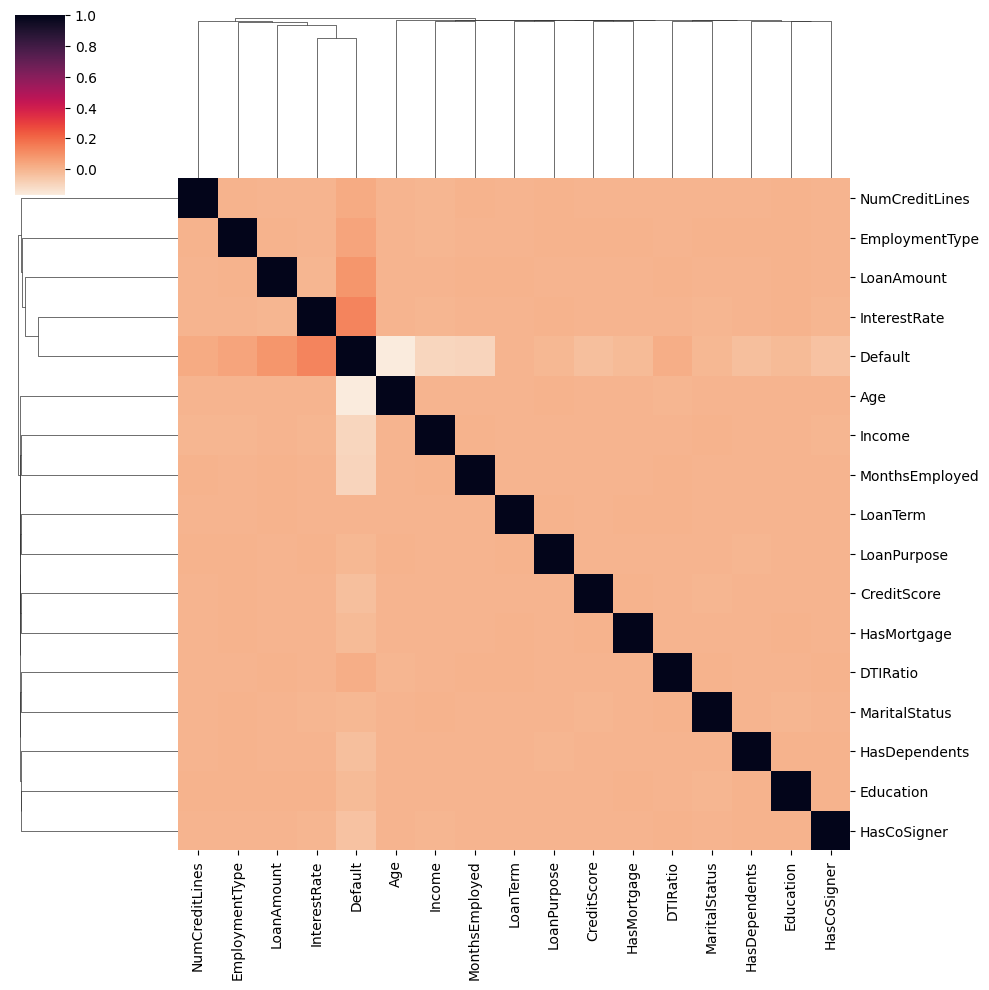

In [ ]:
sns.clustermap(df.corr(), cmap="rocket_r")

In [ ]:
test_df.head(10)

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner
0,CKV34LU7V7,55,112656,92393,581,113,2,23.54,36,0.15,PhD,Self-employed,Single,Yes,Yes,Home,No
1,62KTYNH93J,56,91569,131575,641,54,1,15.19,12,0.43,High School,Part-time,Divorced,Yes,Yes,Education,Yes
2,JGFUSOIUH7,26,78169,75417,569,105,3,18.02,12,0.29,Master's,Part-time,Married,Yes,Yes,Education,Yes
3,4538THBHOX,26,63033,10804,326,118,1,14.71,24,0.41,High School,Part-time,Single,No,No,Business,Yes
4,DXLNA06JHR,24,29665,21182,662,102,3,15.02,60,0.69,PhD,Unemployed,Single,No,Yes,Business,Yes
5,GPXN95JGCL,41,98511,187008,731,20,4,14.88,36,0.46,Master's,Full-time,Divorced,Yes,No,Other,No
6,FIIMGYJEVG,66,49411,159105,371,86,4,13.35,60,0.12,Bachelor's,Self-employed,Married,No,No,Business,Yes
7,22OCHURLWV,34,117617,173967,518,86,4,2.21,12,0.39,High School,Part-time,Single,No,Yes,Business,Yes
8,OKUSLEJ0SG,67,94473,41189,542,15,2,10.17,36,0.33,Master's,Self-employed,Single,No,Yes,Home,No
9,CL8B73H82O,41,95332,151275,363,39,3,12.88,36,0.66,High School,Self-employed,Single,Yes,Yes,Home,Yes


In [ ]:
test_df.describe()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000
mean,437.111732,2.223464,0.614525,30.909665,0.402235,0.391061,30.684473,1.424581
std,260.349331,0.877501,0.488073,13.521263,0.730703,0.863185,39.447725,0.853716
min,6.000000,1.000000,0.000000,0.830000,0.000000,0.000000,0.000000,0.000000
25%,217.500000,1.000000,0.000000,21.833333,0.000000,0.000000,7.895800,1.000000
50%,423.000000,3.000000,1.000000,30.000000,0.000000,0.000000,14.500000,2.000000
75%,656.000000,3.000000,1.000000,38.000000,1.000000,0.000000,32.410400,2.000000
max,890.000000,3.000000,1.000000,71.000000,4.000000,5.000000,262.375000,2.000000


In [ ]:
#these columns were tried
x['LoanToIncomeRatio'] = x['LoanAmount'] / x['Income']
x['CreditAgeInteraction'] = x['CreditScore'] * x['Age']
x['LoanInterestInteraction'] = x['LoanAmount'] * x['InterestRate']
x['DTIIncomeInteraction'] = x['DTIRatio'] * x['Income']

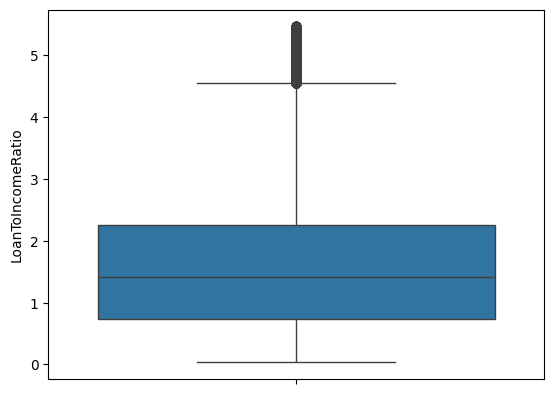

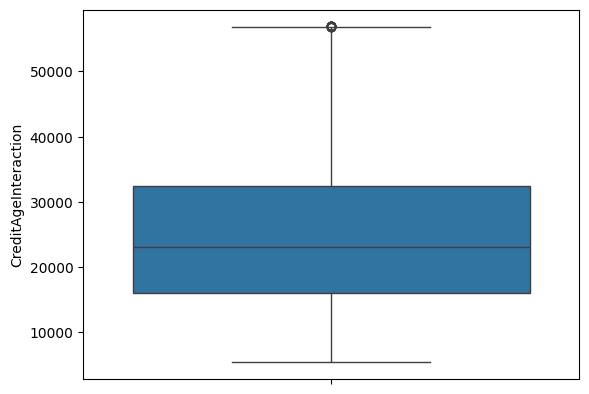

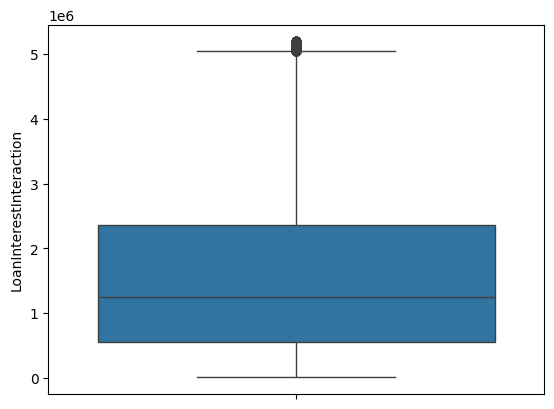

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(data=df, y='LoanToIncomeRatio')
plt.show()
sns.boxplot(data=df, y='CreditAgeInteraction')
plt.show()
sns.boxplot(data=df, y='LoanInterestInteraction')
plt.show()

In [ ]:
def remove_outliers_iqr(df, column):
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = df[column].quantile(0.3)
    Q3 = df[column].quantile(0.7)
    IQR = Q3 - Q1

    # Define bounds for filtering
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter out the outliers
    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

    return df_filtered

# Define the columns to check for outliers
columns_to_check = ['Age',	'Income',	'LoanAmount','CreditScore','MonthsEmployed','NumCreditLines','InterestRate','LoanTerm','DTIRatio']

# Remove outliers for each specified column
for column in columns_to_check:
    df = remove_outliers_iqr(df, column)

In [ ]:
x = x.drop(columns=['LoanAmount','Income','Age','CreditScore'],axis = 1)

In [ ]:
df_num = df.select_dtypes(exclude = ['object'])

<ipython-input-132-2f31310258f2>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'Default' , y = df[col], data =df , palette = 'dark')


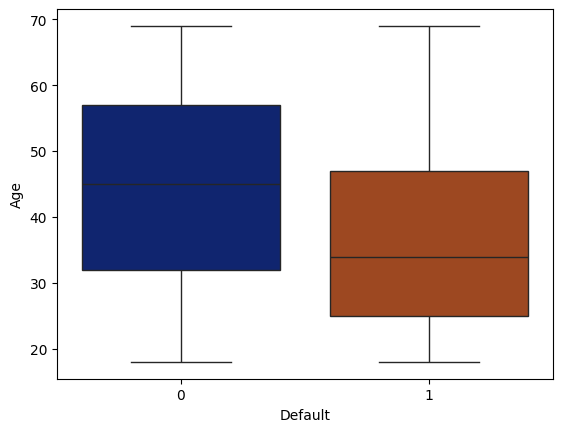

<ipython-input-132-2f31310258f2>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'Default' , y = df[col], data =df , palette = 'dark')


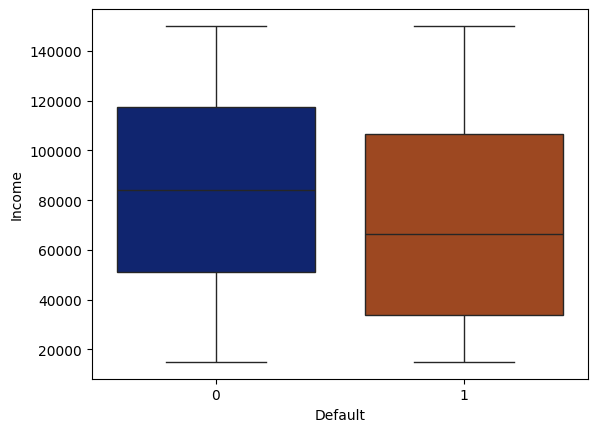

<ipython-input-132-2f31310258f2>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'Default' , y = df[col], data =df , palette = 'dark')


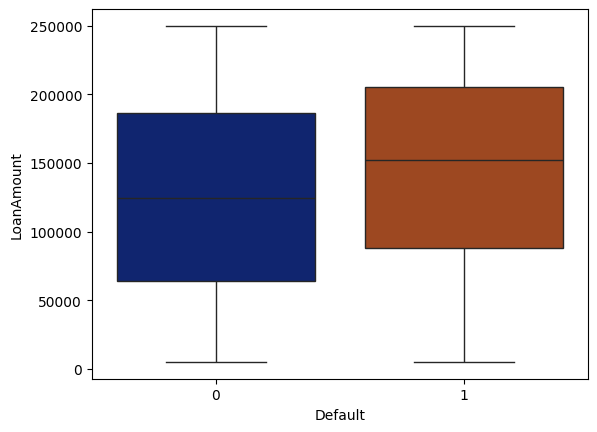

<ipython-input-132-2f31310258f2>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'Default' , y = df[col], data =df , palette = 'dark')


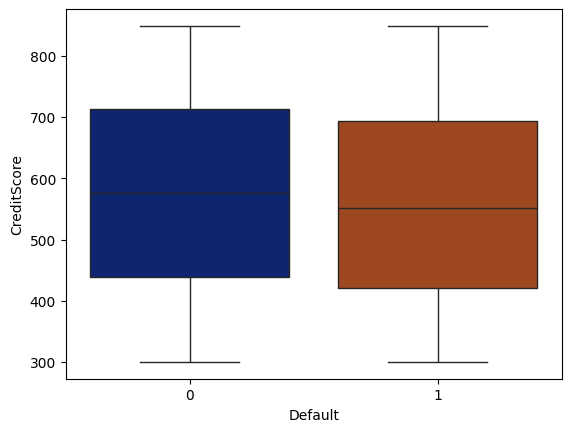

<ipython-input-132-2f31310258f2>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'Default' , y = df[col], data =df , palette = 'dark')


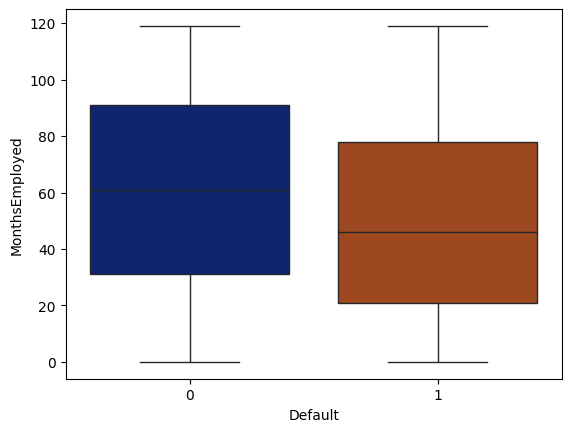

<ipython-input-132-2f31310258f2>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'Default' , y = df[col], data =df , palette = 'dark')


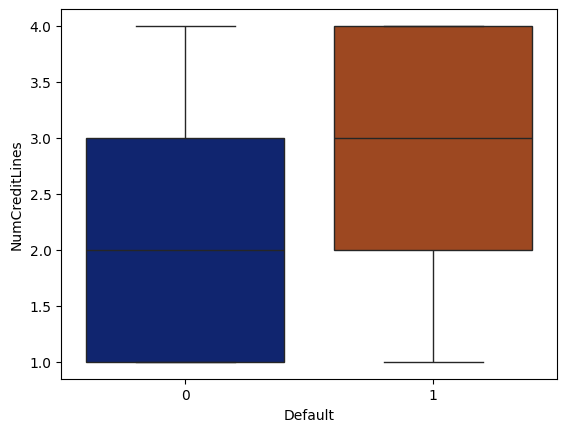

<ipython-input-132-2f31310258f2>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'Default' , y = df[col], data =df , palette = 'dark')


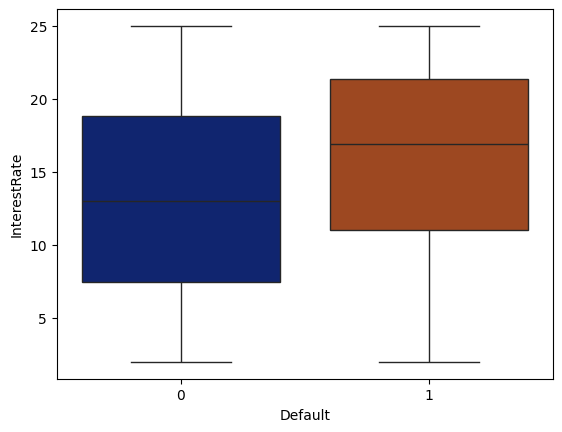

<ipython-input-132-2f31310258f2>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'Default' , y = df[col], data =df , palette = 'dark')


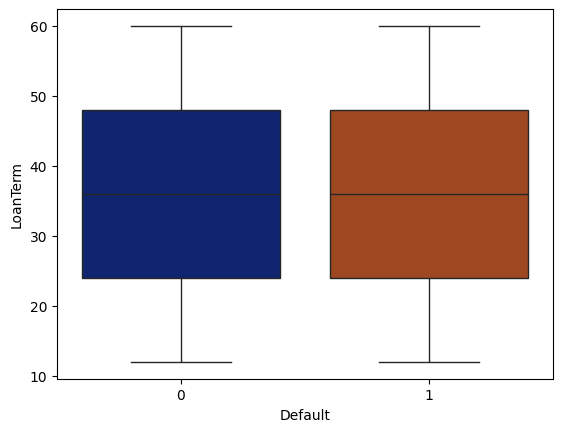

<ipython-input-132-2f31310258f2>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'Default' , y = df[col], data =df , palette = 'dark')


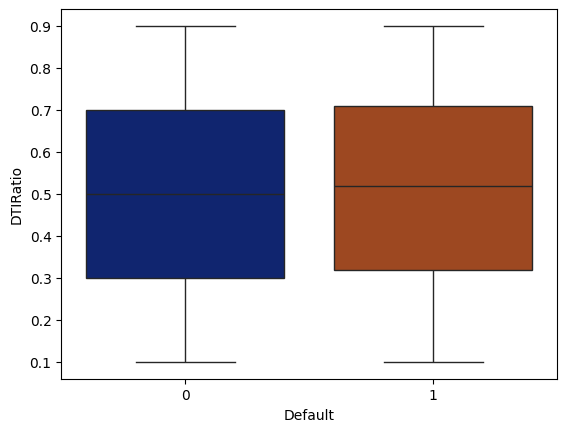

<ipython-input-132-2f31310258f2>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'Default' , y = df[col], data =df , palette = 'dark')


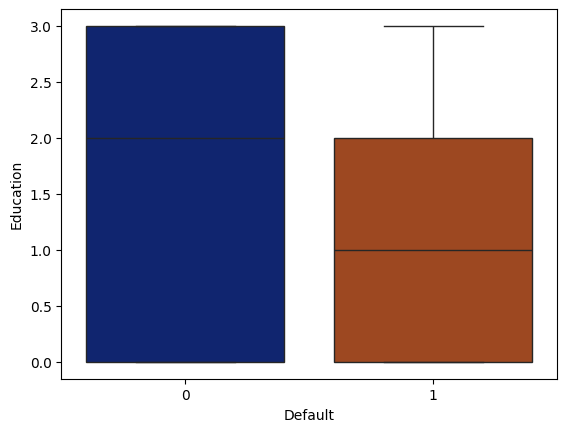

<ipython-input-132-2f31310258f2>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'Default' , y = df[col], data =df , palette = 'dark')


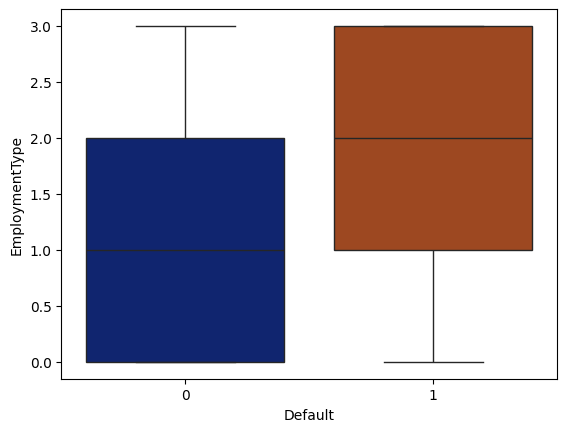

<ipython-input-132-2f31310258f2>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'Default' , y = df[col], data =df , palette = 'dark')


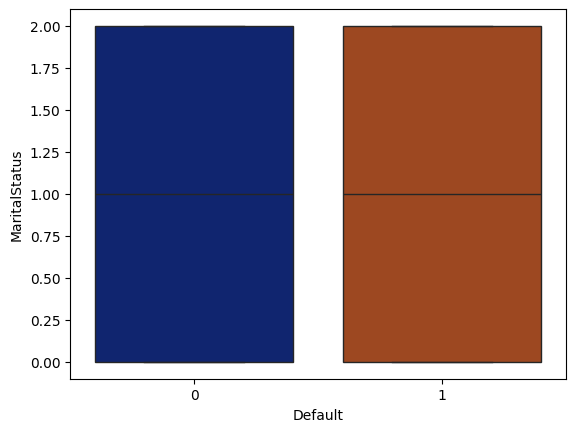

<ipython-input-132-2f31310258f2>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'Default' , y = df[col], data =df , palette = 'dark')


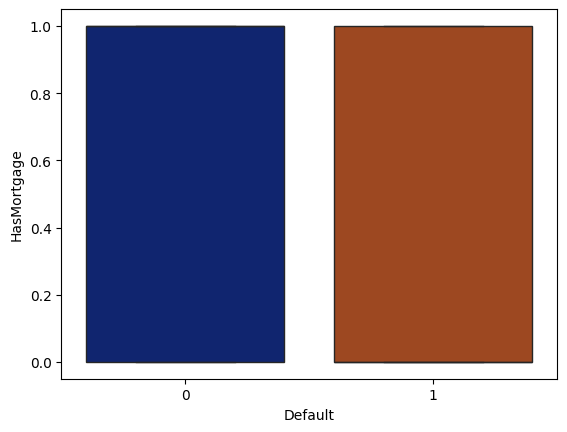

<ipython-input-132-2f31310258f2>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'Default' , y = df[col], data =df , palette = 'dark')


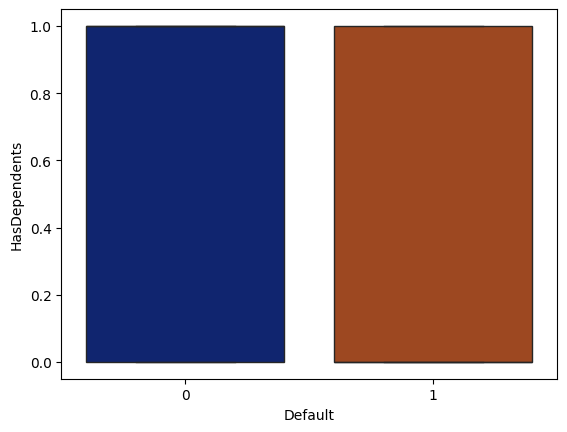

<ipython-input-132-2f31310258f2>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'Default' , y = df[col], data =df , palette = 'dark')


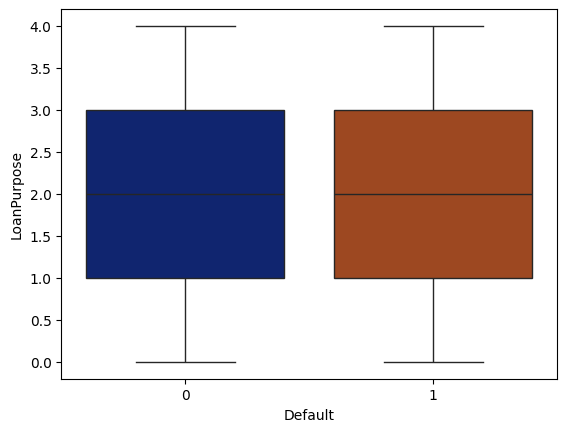

<ipython-input-132-2f31310258f2>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'Default' , y = df[col], data =df , palette = 'dark')


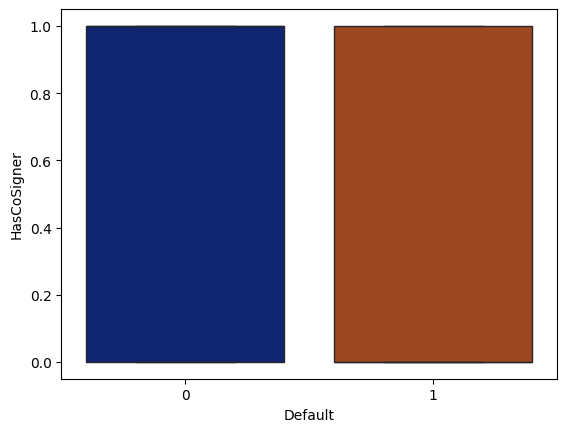

<ipython-input-132-2f31310258f2>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'Default' , y = df[col], data =df , palette = 'dark')


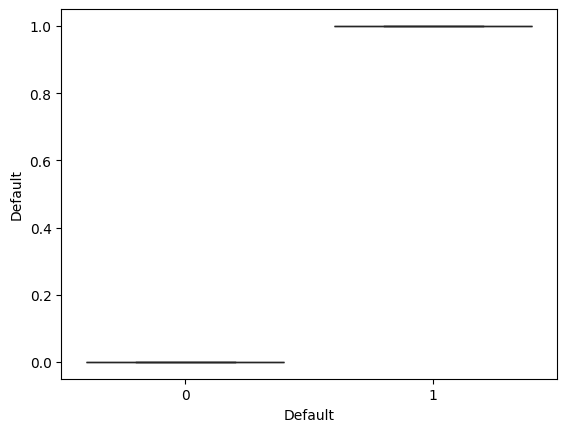

<ipython-input-132-2f31310258f2>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'Default' , y = df[col], data =df , palette = 'dark')


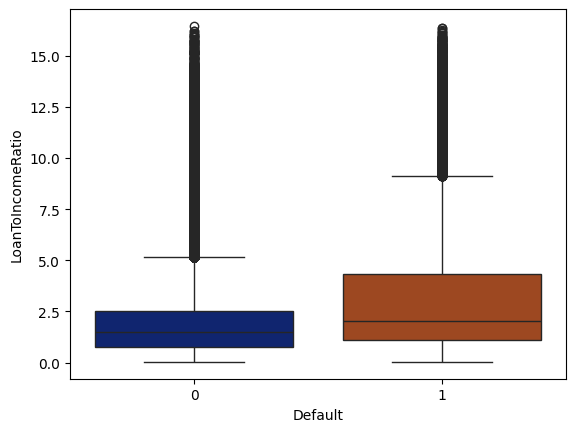

<ipython-input-132-2f31310258f2>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'Default' , y = df[col], data =df , palette = 'dark')


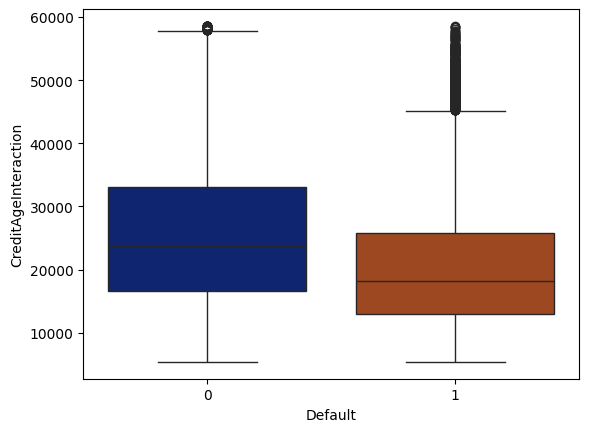

<ipython-input-132-2f31310258f2>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'Default' , y = df[col], data =df , palette = 'dark')


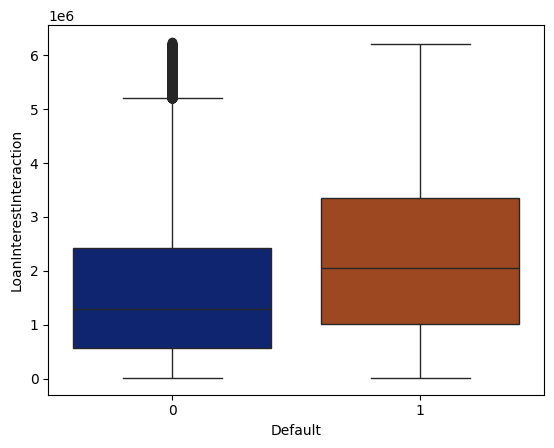

In [ ]:
for col in df_num:
    sns.boxplot(x = 'Default' , y = df[col], data =df , palette = 'dark')
    plt.show()

In [ ]:
# tries removing columns also which have less correlation
x = x.drop(columns = ['MaritalStatus','LoanTerm','HasMortgage','HasDependents','LoanPurpose','HasCoSigner'],axis = 1)

In [ ]:
x.head(10)

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner
0,18,137576,209136,846,26,2,10.47,60,0.81,1,2,2,1,0,1,0
1,47,57194,5970,748,30,2,19.72,36,0.73,1,3,0,0,1,2,0
2,26,84328,95065,453,7,2,24.25,12,0.45,2,2,1,0,0,4,1
3,53,49795,229582,533,107,3,14.44,60,0.17,0,2,2,1,0,0,1
4,49,115450,22072,840,0,4,24.48,12,0.11,0,1,2,0,1,2,1
5,33,44855,39393,416,80,4,16.25,12,0.76,0,3,2,0,0,4,1
6,22,20216,153128,692,90,4,22.91,60,0.32,1,2,1,0,1,0,0
7,57,90343,71189,345,102,4,12.98,12,0.71,0,3,1,0,1,4,1
8,49,35880,96919,353,33,2,10.97,24,0.31,3,2,0,1,0,4,1
9,19,71995,23105,587,105,2,2.06,12,0.38,1,3,0,0,1,4,1


Testing

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=67)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier(random_state=67,n_estimators=500)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
print(f"Random Forest Accuracy: {rf_accuracy:.4f}")

Random Forest Accuracy: 0.8849


In [ ]:
print(rf.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 67, 'verbose': 0, 'warm_start': False}


In [ ]:
dt = DecisionTreeClassifier(random_state=67)
dt.fit(X_train,y_train)
dt_pred = dt.predict(X_test)
dt_mse = accuracy_score(y_test, dt_pred)
print(f"Decision Tree Best MSE: {dt_mse}")

Decision Tree Best MSE: 0.7994664186410809


In [ ]:
xgboost = xgb.XGBClassifier(n_estimator = 400,objective='binary:logistic', random_state=67, eval_metric='logloss')
xgboost.fit(X_train,y_train)

xgb_pred = xgboost.predict(X_test)
xgb_accuracy = accuracy_score(y_test, xgb_pred)
print(f"XGBoost Best Accuracy: {xgb_accuracy}")

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:25:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Best Accuracy: 0.883272958684159


In [ ]:
!pip install catboost
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score

# Initialize CatBoostClassifier
catboost_model = CatBoostClassifier(
    iterations=500,
    learning_rate=0.1,
    depth=6,
    random_seed=67,
    verbose=0
)

# Fit the model on the training data
catboost_model.fit(X_train, y_train)

# Make predictions on the test set
catboost_pred = catboost_model.predict(X_test)

# Evaluate accuracy
catboost_accuracy = accuracy_score(y_test, catboost_pred)
print(f"CatBoost Accuracy: {catboost_accuracy:.4f}")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 6.0 MB/s eta 0:00:00
CatBoost Accuracy: 0.8852


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logistic_model = LogisticRegression(random_state=67, max_iter=1000)
logistic_model.fit(X_train, y_train)
logistic_pred = logistic_model.predict(X_test)
logistic_accuracy = accuracy_score(y_test, logistic_pred)
print(f"Logistic Regression Accuracy: {logistic_accuracy:.4f}")

Logistic Regression Accuracy: 0.8838


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
dt = DecisionTreeClassifier(random_state=67)
dt_params = {
     'max_depth': [5, 10, 20, 30, None],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 5, 10],
    'criterion': ['gini', 'entropy'],
    'max_features': ['sqrt', 'log2', None]
}

# Grid Search for Decision Tree
dt_grid = GridSearchCV(dt, dt_params, cv=5, scoring='accuracy', n_jobs=-1)
dt_grid.fit(X_train,y_train)

# Best model and score
best_dt = dt_grid.best_estimator_
dt_pred = best_dt.predict(X_test)
dt_mse = accuracy_score(y_test, dt_pred)
print(f"Decision Tree Best MSE: {dt_mse}")

Decision Tree Best MSE: 0.883272958684159


In [ ]:
test_df.head(10)

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner
0,CKV34LU7V7,55,112656,92393,581,113,2,23.54,36,0.15,PhD,Self-employed,Single,Yes,Yes,Home,No
1,62KTYNH93J,56,91569,131575,641,54,1,15.19,12,0.43,High School,Part-time,Divorced,Yes,Yes,Education,Yes
2,JGFUSOIUH7,26,78169,75417,569,105,3,18.02,12,0.29,Master's,Part-time,Married,Yes,Yes,Education,Yes
3,4538THBHOX,26,63033,10804,326,118,1,14.71,24,0.41,High School,Part-time,Single,No,No,Business,Yes
4,DXLNA06JHR,24,29665,21182,662,102,3,15.02,60,0.69,PhD,Unemployed,Single,No,Yes,Business,Yes
5,GPXN95JGCL,41,98511,187008,731,20,4,14.88,36,0.46,Master's,Full-time,Divorced,Yes,No,Other,No
6,FIIMGYJEVG,66,49411,159105,371,86,4,13.35,60,0.12,Bachelor's,Self-employed,Married,No,No,Business,Yes
7,22OCHURLWV,34,117617,173967,518,86,4,2.21,12,0.39,High School,Part-time,Single,No,Yes,Business,Yes
8,OKUSLEJ0SG,67,94473,41189,542,15,2,10.17,36,0.33,Master's,Self-employed,Single,No,Yes,Home,No
9,CL8B73H82O,41,95332,151275,363,39,3,12.88,36,0.66,High School,Self-employed,Single,Yes,Yes,Home,Yes


In [ ]:
best_dt

DecisionTreeClassifier(max_depth=3, random_state=67)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

rf_random = RandomizedSearchCV(rf, rf_params, cv=5, scoring='accuracy', n_jobs=-1, n_iter=50, random_state=67)
rf_random.fit(X_train, y_train)

best_rf = rf_random.best_estimator_
rf_pred = best_rf.predict(X_test)
rf_mse = accuracy_score(y_test, rf_pred)
print(f"Random Forest Best Accuracy: {rf_mse}")

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


KeyboardInterrupt: 

In [ ]:
# Define Random Forest model and hyperparameters
rf = RandomForestClassifier(random_state=67)
rf_params = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 4, 6, 8],
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False],
    'class_weight': [None, 'balanced', 'balanced_subsample']
}

# Grid Search for Random Forest
rf_grid = GridSearchCV(rf, rf_params, cv=5, scoring='accuracy', n_jobs=-1)
rf_grid.fit(X_train,y_train)

# Best model and score
best_rf = rf_grid.best_estimator_
rf_pred = best_rf.predict(X_test)
rf_mse = accuracy_score(y_test, rf_pred)
print(f"Random Forest Best MSE: {rf_mse}")

KeyboardInterrupt: 

In [ ]:
xgb_accuracy = accuracy_score(train.loc[:, 'Survived'], best_rf.predict(train.loc[:, 'Pclass':]))
print(f"XGBoost Train  Best Accuracy: {xgb_accuracy}")
xgb_accuracy = accuracy_score(test.loc[:, 'Survived'], rf_pred)
print(f"XGBoost Test  Best Accuracy: {xgb_accuracy}")
print("XGBoost Classification Report:")
print(classification_report(test.loc[:, 'Survived'], rf_pred))

XGBoost Train  Best Accuracy: 0.9019607843137255
XGBoost Test  Best Accuracy: 0.8156028368794326
XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.90      0.86        88
           1       0.80      0.68      0.73        53

    accuracy                           0.82       141
   macro avg       0.81      0.79      0.80       141
weighted avg       0.81      0.82      0.81       141



In [ ]:
print(best_rf.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 7, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 200, 'n_jobs': None, 'oob_score': False, 'random_state': 67, 'verbose': 0, 'warm_start': False}


In [ ]:
xgboost = xgb.XGBClassifier(objective='binary:logistic', random_state=67, eval_metric='logloss')
xgboost_params = {
    'n_estimators': [50,100, 200, 300,500,1000],
    'max_depth': [1, 5, 10,20],
    'learning_rate': [ 0.01, 0.8,0.9,0.1],
    'subsample': [0.7, 0.8,0.9, 1.0],
}

# Grid Search for XGBoost
xgb_grid = GridSearchCV(xgboost, xgboost_params, cv=5, scoring='accuracy', n_jobs=-1)
xgb_grid.fit(X_train,y_train)

# Best model and score
best_xgb = xgb_grid.best_estimator_
xgb_pred = best_xgb.predict(X_test)
xgb_accuracy = accuracy_score(y_test, xgb_pred)
print(f"XGBoost Best Accuracy: {xgb_accuracy}")

XGBoost Best Accuracy: 0.8297872340425532


In [ ]:
xgb_accuracy = accuracy_score(train.loc[:, 'Survived'], best_xgb.predict(train.loc[:, 'Pclass':]))
print(f"XGBoost Train  Best Accuracy: {xgb_accuracy}")
xgb_accuracy = accuracy_score(test.loc[:, 'Survived'], xgb_pred)
print(f"XGBoost Test  Best Accuracy: {xgb_accuracy}")
print("XGBoost Classification Report:")
print(classification_report(test.loc[:, 'Survived'], xgb_pred))

XGBoost Train  Best Accuracy: 0.7878787878787878
XGBoost Test  Best Accuracy: 0.8297872340425532
XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.91      0.87        88
           1       0.82      0.70      0.76        53

    accuracy                           0.83       141
   macro avg       0.83      0.80      0.81       141
weighted avg       0.83      0.83      0.83       141



In [ ]:
# Define XGBoost model and hyperparameters (without early stopping)
xgboost = xgb.XGBClassifier(objective='binary:logistic', random_state=67, eval_metric='logloss')
xgboost_params = {
    'n_estimators': [50,100, 200, 300],
    'max_depth': [3,4, 5],
    'learning_rate': [ 0.01, 0.8,0.9,0.1],
    'subsample': [0.7, 0.8,0.9, 1.0],
}

# Grid Search for XGBoost (without early stopping in the grid search)
xgb_grid = GridSearchCV(xgboost, xgboost_params, cv=5, scoring='accuracy', n_jobs=-1)
xgb_grid.fit(X_train, y_train)

# Retrieve the best hyperparameters and re-fit with early stopping
best_params = xgb_grid.best_params_
best_xgb = xgb.XGBClassifier(**best_params, objective='binary:logistic', random_state=67, eval_metric='logloss')

# Fit the final model with early stopping
best_xgb.fit(X_train, y_train,eval_set=[(X_val, y_val)], verbose=False)

# Predict on the test data
xgb_pred = best_xgb.predict(test.loc[:, 'Pclass':])
xgb_acc = accuracy_score(test.loc[:, 'Survived'], xgb_pred)
print(f"XGBoost Best Accuracy: {xgb_acc}")


XGBoost Best Accuracy: 0.8251748251748252


In [ ]:
print(best_xgb.get_params())

{'objective': 'binary:logistic', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': None, 'device': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': 'logloss', 'feature_types': None, 'gamma': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': 0.1, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': 5, 'max_leaves': None, 'min_child_weight': None, 'missing': nan, 'monotone_constraints': None, 'multi_strategy': None, 'n_estimators': 100, 'n_jobs': None, 'num_parallel_tree': None, 'random_state': 67, 'reg_alpha': None, 'reg_lambda': None, 'sampling_method': None, 'scale_pos_weight': None, 'subsample': 1, 'tree_method': None, 'validate_parameters': None, 'verbosity': None, 'use_label_encoder': False}


In [ ]:
test_df['LoanToIncomeRatio'] = test_df['LoanAmount'] / test_df['Income']
test_df['CreditAgeInteraction'] = test_df['CreditScore'] * test_df['Age']
test_df['LoanInterestInteraction'] = test_df['LoanAmount'] * test_df['InterestRate']
test_df['DTIIncomeInteraction'] = test_df['DTIRatio'] * test_df['Income']

In [ ]:
test_df = test_df.drop(columns=['LoanAmount'],axis = 1)

---
Final model in which test was tested:
---

In [15]:
# used xgboost as it was giving better results (without skewwing)
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
import numpy as np

xgboost = XGBClassifier(
    objective='binary:logistic',
    eval_metric='mlogloss',
    learning_rate=0.1,
    max_depth=4,
    n_estimators=100,
    random_state=67,
    subsample=0.6,
    scale_pos_weight=1,
    use_label_encoder=False,
    enable_categorical=False,
    missing=np.nan
)
xgboost.fit(X_train,y_train)

xgb_pred = xgboost.predict(X_test)
xgb_accuracy = accuracy_score(y_test, xgb_pred)
print(f"XGBoost Best Accuracy: {xgb_accuracy}")
print(xgboost.get_params())

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:39:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Best Accuracy: 0.8858429606422558
{'objective': 'binary:logistic', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': None, 'device': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': 'mlogloss', 'feature_types': None, 'gamma': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': 0.1, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': 4, 'max_leaves': None, 'min_child_weight': None, 'missing': nan, 'monotone_constraints': None, 'multi_strategy': None, 'n_estimators': 100, 'n_jobs': None, 'num_parallel_tree': None, 'random_state': 67, 'reg_alpha': None, 'reg_lambda': None, 'sampling_method': None, 'scale_pos_weight': 1, 'subsample': 0.6, 'tree_method': None, 'validate_parameters': None, 'verbosity': None, 'use_label_encoder': False}


In [ ]:
test_df.head(10)

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,LoanToIncomeRatio,CreditAgeInteraction
0,55,112656,92393,581,113,2,23.54,36,0.15,3,2,2,1,1,3,0,0.820134,31955
1,56,91569,131575,641,54,1,15.19,12,0.43,1,1,0,1,1,2,1,1.436895,35896
2,26,78169,75417,569,105,3,18.02,12,0.29,2,1,1,1,1,2,1,0.964794,14794
3,26,63033,10804,326,118,1,14.71,24,0.41,1,1,2,0,0,1,1,0.171402,8476
4,24,29665,21182,662,102,3,15.02,60,0.69,3,3,2,0,1,1,1,0.714040,15888
5,41,98511,187008,731,20,4,14.88,36,0.46,2,0,0,1,0,4,0,1.898346,29971
6,66,49411,159105,371,86,4,13.35,60,0.12,0,2,1,0,0,1,1,3.220032,24486
7,34,117617,173967,518,86,4,2.21,12,0.39,1,1,2,0,1,1,1,1.479097,17612
8,67,94473,41189,542,15,2,10.17,36,0.33,2,2,2,0,1,3,0,0.435987,36314
9,41,95332,151275,363,39,3,12.88,36,0.66,1,2,2,1,1,3,1,1.586823,14883


In [13]:
label_add = test_df['LoanID']
test_df = test_df.drop(columns=['LoanID'],axis = 1)



In [14]:
#test_df = sc.transform(test_df)
poly_pred_test = xgboost.predict(test_df)
result = np.column_stack((label_add, poly_pred_test))
result
result = pd.DataFrame(result, columns=['LoanID', 'Default'])

result = result.reset_index(drop=True)
result.to_csv('output.csv', index=False)